  # Descrição do problema de classificação
    Dataset: "Multiclass Diabetes Dataset

    https://www.kaggle.com/datasets/yasserhessein/multiclass-diabetes-dataset/data

    https://data.mendeley.com/datasets/wj9rwkp9c2/1

    Características do Dataset
  * Gender (Gênero): O sexo biológico do indivíduo. Geralmente codificado como: 0 = Feminino, 1 = Masculino. O gênero pode influenciar o risco de diabetes devido a diferenças hormonais e de estilo de vida.

  * AGE (Idade): A idade do sujeito em anos. A idade é um fator de risco crítico para o aumento do risco de diabetes, especialmente após os 45 anos.

  * Urea (Ureia): Uma medida da ureia (em mg/dL) no sangue. Níveis altos podem indicar problemas renais, que são complicações comuns do diabetes. Intervalo normal: ~7–20 mg/dL.

  * Cr (Creatinine - Creatinina): Mede o nível de creatinina no sangue (em mg/dL). Também é um marcador de função renal. Níveis elevados de creatinina podem sugerir problemas renais, frequentemente ligados ao diabetes. Intervalo normal: ~0.6–1.3 mg/dL.

  * HbA1c (Glycated Hemoglobin - Hemoglobina Glicada): Um indicador-chave do nível médio de glicose no sangue nos últimos 2-3 meses. Expresso em porcentagem. Normal: <5.7%, Pré-diabético: 5.7–6.4%, Diabético: ≥6.5%.

  * Chol (Cholesterol - Colesterol): Colesterol total no sangue (em mg/dL). O colesterol alto é um fator de risco para doenças cardiovasculares, frequentemente observado em indivíduos diabéticos. Normal: <200 mg/dL.

  * TG (Triglycerides - Triglicerídeos): Mede a quantidade de gordura no sangue (em mg/dL). Níveis altos estão associados à resistência à insulina e à síndrome metabólica. Normal: <150 mg/dL.

  * HDL (High-Density Lipoprotein): O "bom" colesterol (em mg/dL). Níveis mais altos são melhores. Ajuda a remover o excesso de colesterol da corrente sanguínea. Ideal: >40 mg/dL (homens), >50 mg/dL (mulheres).

  * LDL (Low-Density Lipoprotein): O "mau" colesterol (em mg/dL). Níveis altos contribuem para o acúmulo de placa nas artérias. Ótimo: <100 mg/dL.

  * VLDL (Very Low-Density Lipoprotein): Outro tipo de "mau" colesterol (em mg/dL). Transporta triglicerídeos. Estimado frequentemente como TG/5. Níveis altos de VLDL estão associados a um risco aumentado de diabetes. Normal: 2–30 mg/dL.

  * BMI (Body Mass Index - Índice de Massa Corporal): Uma medida de gordura corporal com base no peso e na altura (em kg/m²). A obesidade (IMC ≥30) é um fator de risco importante para o Diabetes Tipo 2. Abaixo do peso: <18.5, Normal: 18.5–24.9, Sobrepeso: 25–29.9, Obeso: ≥30.

  * Class (Classe): Rótulo do alvo: indica o status de diabetes. Geralmente codificado como: 0 = Não-Diabético, 1 = Diabético, 2 = Previsão-Diabético. Este é o resultado que você está tentando prever ou classificar.

# Instalação das bibliotecas

In [ ]:
!pip install pandas==2.2.2, numpy=2.0.2, matplotlib==3.10.0, seaborn==0.13.2, plotly==5.24.1, plotly==1.16.2

# Importação das bibliotecas

In [15]:
# Importação das bibliotecas

# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly
import plotly.express as px
import plotly.figure_factory as ff

# Scipy
from scipy.stats import shapiro, kstest, normaltest, chi2_contingency

# Sklearn - Preprocessing e decomposição
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sklearn - Model selection
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# Sklearn - Algoritmos de Machine Learning
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import tree

# Sklearn - Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Funções úteis

### verificar_normalidade

In [16]:
def verificar_normalidade(data_series:pd.Series, feature_name:str, alpha:float=0.05) -> None:
    """
    Aplica os testes de Shapiro-Wilk e D'Agostino's K-squared a uma série de dados
    e imprime uma conclusão sobre sua normalidade.

    Args:
        data_series (pd.Series): A série de dados (coluna do DataFrame) a ser testada.
        feature_name (str): O nome da feature para impressão.
        alpha (float): O nível de significância para o teste.
    """
    def teste_shapiro(data_series:pd.Series,alpha:float) -> None:
      # 1. Teste de Shapiro-Wilk
      stat_shapiro, p_shapiro = shapiro(data_series)
      print(f"\n1. Teste de Shapiro-Wilk:")
      print(f"   - Estatística do teste = {stat_shapiro:.4f}")
      print(f"   - P-valor = {p_shapiro:.4f}")
      if p_shapiro > alpha:
          print(f"   - Conclusão (alpha={alpha}): Não há evidência para rejeitar a normalidade (Normal).")
      else:
          print(f"   - Conclusão (alpha={alpha}): A hipótese de normalidade é rejeitada (Não Normal).")

    def teste_k_squared(data_series:pd.Series,alpha:float) -> None:
      # 2. Teste de D'Agostino's K-squared
      stat_k2, p_k2 = normaltest(data_series)
      print(f"\n2. Teste de D'Agostino's K-squared:")
      print(f"   - Estatística do teste = {stat_k2:.4f}")
      print(f"   - P-valor = {p_k2:.4f}")
      if p_k2 > alpha:
          print(f"   - Conclusão (alpha={alpha}): Não há evidência para rejeitar a normalidade (Normal).")
      else:
          print(f"   - Conclusão (alpha={alpha}): A hipótese de normalidade é rejeitada (Não Normal).")

    print(f"--- Análise de Normalidade para a Feature: '{feature_name}' ---")
    teste_shapiro(data_series=data_series, alpha=alpha)
    teste_k_squared(data_series=data_series, alpha=alpha)
    print("-" * 50 + "\n")

# Carregando dados

In [17]:
data_raw = pd.read_csv("/content/Dataset of Diabetes .csv")

In [21]:
data_raw.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [22]:
data = data_raw.drop(columns=['ID', 'No_Pation'])
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Tratamento de dados

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   object 
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


## Conversão de categóricas para numéricas

In [24]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variáveis numéricas: ", num_features)

cat_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nVariáveis categóricas: ", cat_features)

Variáveis numéricas:  ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

Variáveis categóricas:  ['Gender', 'CLASS']


### Feature 'Gender'

In [25]:
data['Gender'].value_counts(normalize=False)

,count
Gender,
M,565
F,434
f,1


In [26]:
mappig_gender = {'F': 0, 'M': 1, 'f': 0}
data['Gender'] = data['Gender'].map(mappig_gender)
data['Gender'].value_counts(normalize=False)

,count
Gender,
1,565
0,435


### Variável resposta 'CLASS'

In [27]:
data['CLASS'].value_counts(normalize=False)

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


In [28]:
# Ajustando variável resposta

mapping_class = {'Y': 0, 'N': 1, 'P': 2, 'Y ': 0, 'N ':1}
data['CLASS'] = data['CLASS'].map(mapping_class)
data['CLASS'].value_counts(normalize=False)

,count
CLASS,
0,844
1,103
2,53


## Amostras duplicadas

In [29]:
# Identificando presença de valores repetidos
data[data.duplicated()]

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
17,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,1
33,0,42,5.0,73,4.5,6.2,1.0,1.1,4.6,0.4,24.0,1
42,1,33,2.0,54,5.4,3.7,1.3,0.8,2.4,0.6,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
991,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,0
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,0
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,0
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,0


In [30]:
data_without_duplicates = data.drop_duplicates().reset_index(drop=True)
data_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  826 non-null    int64  
 1   AGE     826 non-null    int64  
 2   Urea    826 non-null    float64
 3   Cr      826 non-null    int64  
 4   HbA1c   826 non-null    float64
 5   Chol    826 non-null    float64
 6   TG      826 non-null    float64
 7   HDL     826 non-null    float64
 8   LDL     826 non-null    float64
 9   VLDL    826 non-null    float64
 10  BMI     826 non-null    float64
 11  CLASS   826 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 77.6 KB


# Análise Exploratória de Dados (EDA)

In [31]:
# estatística descritiva das variáveis numéricas
data_without_duplicates[num_features].describe([.1, .25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
AGE,826.0,53.490315,8.808427,20.0,40.500,51.000,55.000,59.0,61.000,65.750,75.000,79.00
Urea,826.0,5.184677,3.077831,0.5,2.800,3.615,4.600,5.7,7.650,10.000,20.800,38.90
Cr,826.0,69.024213,59.557108,6.0,38.000,48.000,59.000,73.0,91.500,112.750,339.750,800.00
HbA1c,826.0,8.326344,2.602589,0.9,5.000,6.500,8.100,10.2,11.800,12.575,14.600,16.00
Chol,826.0,4.898208,1.328812,0.0,3.400,4.000,4.800,5.6,6.500,7.200,9.275,10.30
TG,826.0,2.399370,1.456850,0.3,1.000,1.500,2.015,3.0,4.200,5.100,7.150,13.80
HDL,826.0,1.211804,0.679610,0.2,0.775,0.900,1.100,1.3,1.715,1.900,3.600,9.90
LDL,826.0,2.590061,1.132863,0.3,1.300,1.700,2.500,3.3,4.000,4.300,5.600,9.90
VLDL,826.0,1.774576,3.517931,0.1,0.500,0.700,1.000,1.5,2.000,4.775,19.150,35.00
BMI,826.0,29.459274,4.996676,19.0,22.750,26.000,30.000,33.0,36.600,38.000,39.000,47.75


## Análise univariada

### Feature HbA1c

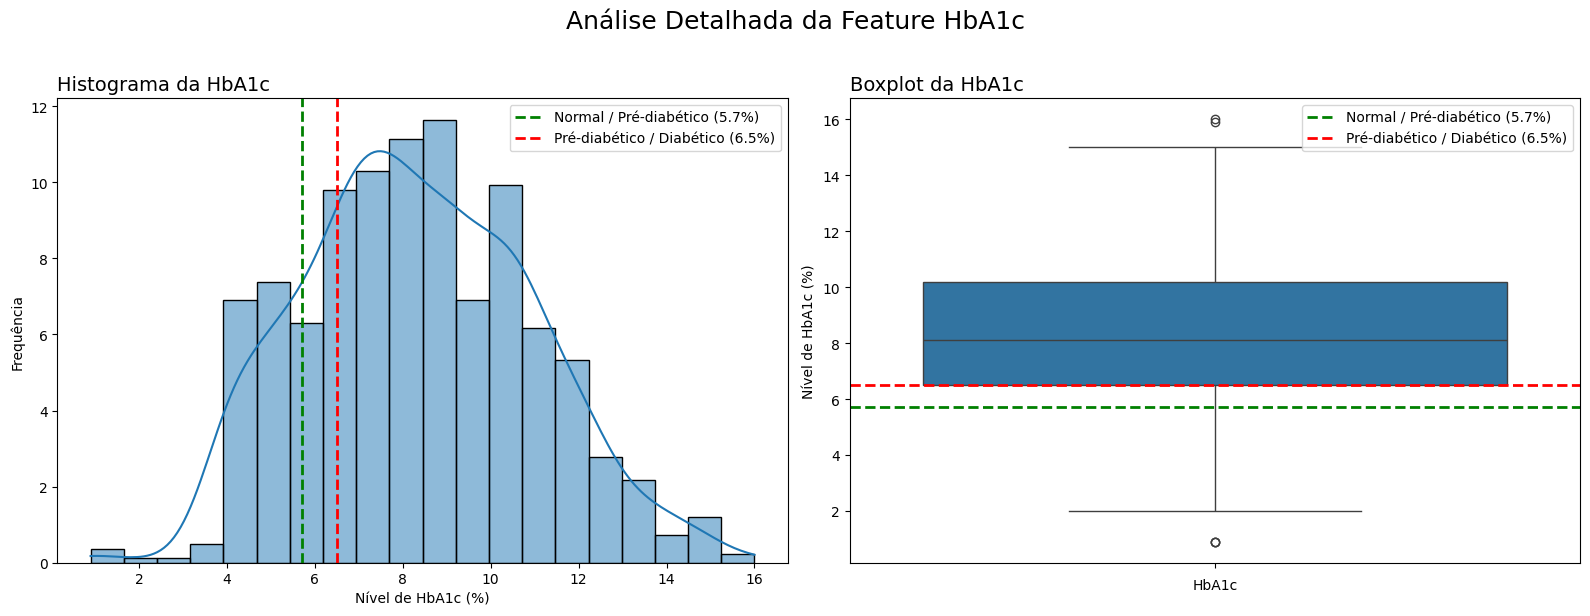

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linhas de Referência
sns.histplot(data_without_duplicates['HbA1c'], kde=True, ax=axes[0], bins=20,stat='percent')
axes[0].set_title('Histograma da HbA1c', fontsize=14, loc='left')
axes[0].set_xlabel('Nível de HbA1c (%)')
axes[0].set_ylabel('Frequência')

# Adicionando a linha vertical para o limite inferior de Pré-diabetes (5.7)
axes[0].axvline(x=5.7, color='green', linestyle='--', linewidth=2, label='Normal / Pré-diabético (5.7%)')
# Adicionando a linha vertical para o limite inferior de Diabetes (6.5)
axes[0].axvline(x=6.5, color='red', linestyle='--', linewidth=2, label='Pré-diabético / Diabético (6.5%)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['HbA1c'], ax=axes[1])
axes[1].set_title('Boxplot da HbA1c', fontsize=14, loc='left')
axes[1].set_ylabel('Nível de HbA1c (%)')
axes[1].set_xlabel('HbA1c')

# Adicionando os limites para o HbA1c no boxplot
axes[1].axhline(y=5.7, color='green', linestyle='--', linewidth=2, label='Normal / Pré-diabético (5.7%)')
axes[1].axhline(y=6.5, color='red', linestyle='--', linewidth=2, label='Pré-diabético / Diabético (6.5%)')

axes[1].legend() # Mostra a legenda também no segundo gráfico

plt.suptitle('Análise Detalhada da Feature HbA1c', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

In [33]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['HbA1c'], 'HbA1c')

--- Análise de Normalidade para a Feature: 'HbA1c' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.9909
   - P-valor = 0.0001
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 10.1089
   - P-valor = 0.0064
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature AGE

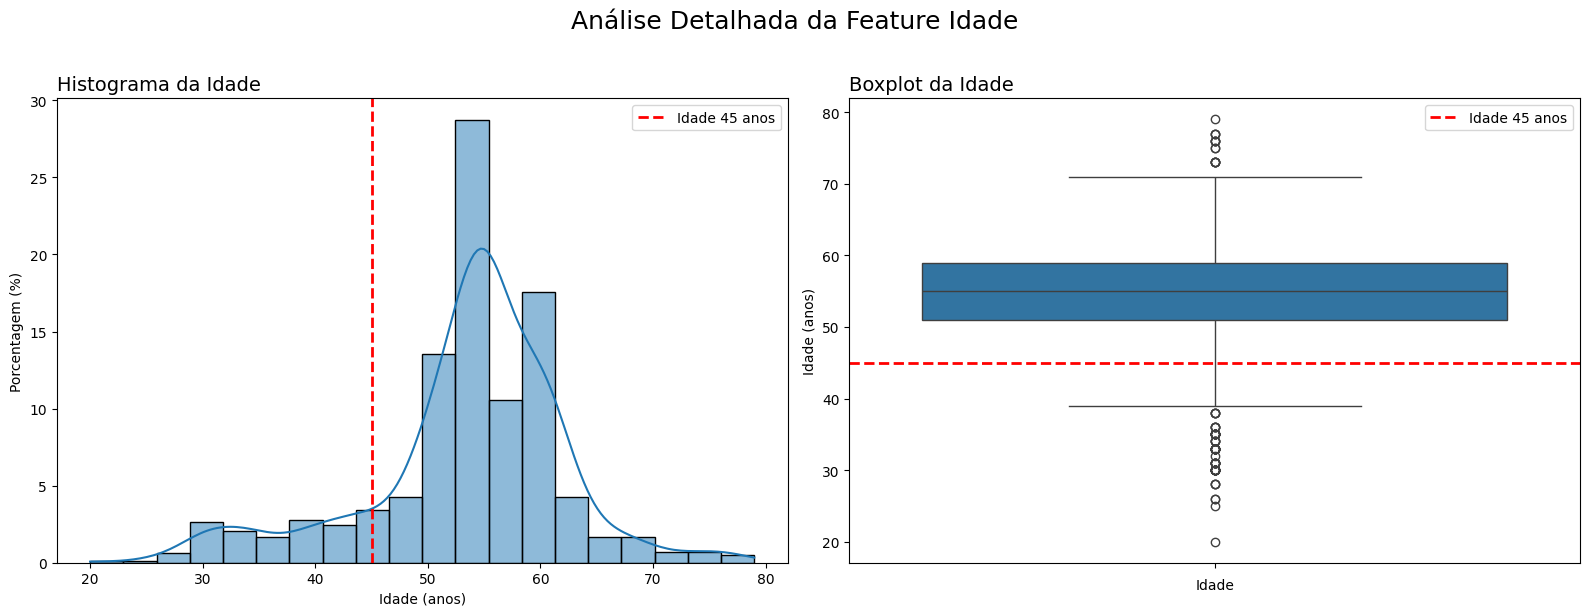

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linha de Referência
sns.histplot(data_without_duplicates['AGE'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma da Idade', fontsize=14, loc='left')
axes[0].set_xlabel('Idade (anos)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando a linha vertical para idade de 45 anos
axes[0].axvline(x=45, color='red', linestyle='--', linewidth=2, label='Idade 45 anos')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['AGE'], ax=axes[1])
axes[1].set_title('Boxplot da Idade', fontsize=14, loc='left')
axes[1].set_ylabel('Idade (anos)')
axes[1].set_xlabel('Idade')

# Adicionando a linha de referência para idade de 45 anos no boxplot
axes[1].axhline(y=45, color='red', linestyle='--', linewidth=2, label='Idade 45 anos')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature Idade', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [35]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['AGE'], 'AGE')

--- Análise de Normalidade para a Feature: 'AGE' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.9231
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 100.0880
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature Urea

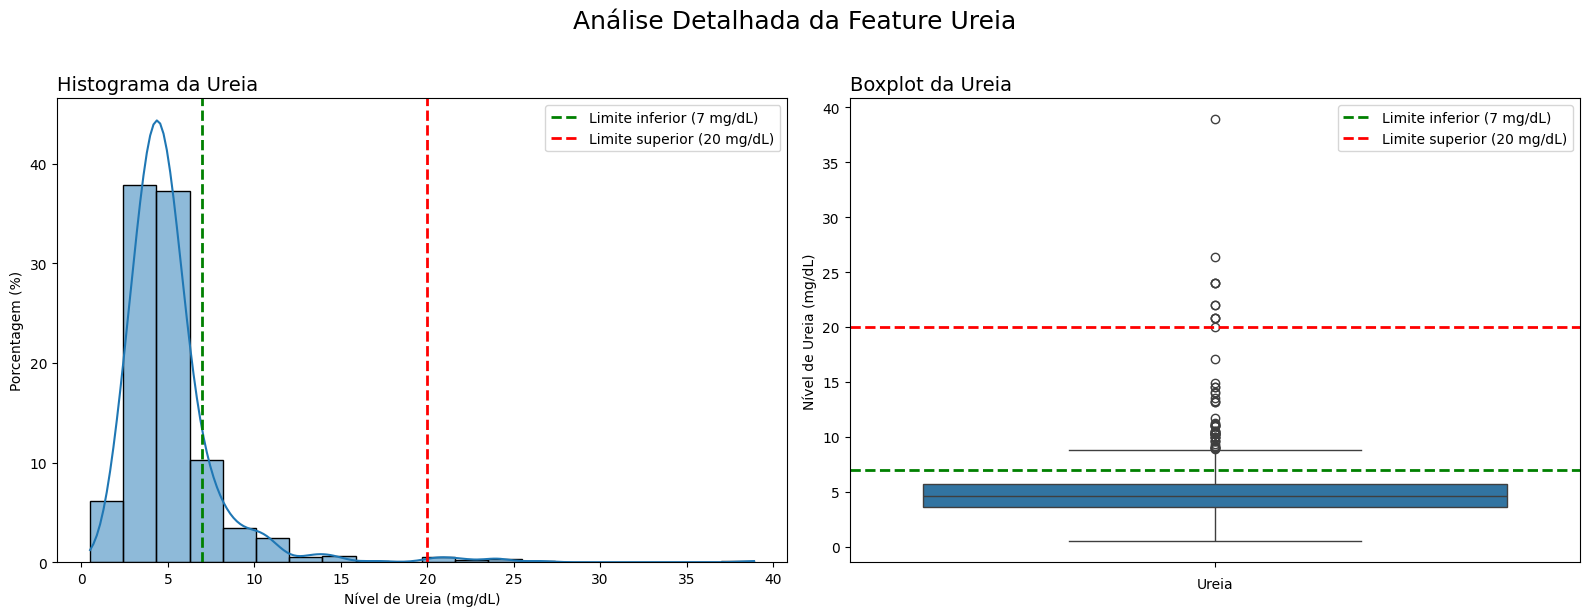

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linhas de Referência
sns.histplot(data_without_duplicates['Urea'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma da Ureia', fontsize=14, loc='left')
axes[0].set_xlabel('Nível de Ureia (mg/dL)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando a linha vertical para o limite normal (7)
axes[0].axvline(x=7, color='green', linestyle='--', linewidth=2, label='Limite inferior (7 mg/dL)')
# Adicionando a linha vertical para o limite elevado (20)
axes[0].axvline(x=20, color='red', linestyle='--', linewidth=2, label='Limite superior (20 mg/dL)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['Urea'], ax=axes[1])
axes[1].set_title('Boxplot da Ureia', fontsize=14, loc='left')
axes[1].set_ylabel('Nível de Ureia (mg/dL)')
axes[1].set_xlabel('Ureia')

# Adicionando os limites para a Ureia no boxplot
axes[1].axhline(y=7, color='green', linestyle='--', linewidth=2, label='Limite inferior (7 mg/dL)')
axes[1].axhline(y=20, color='red', linestyle='--', linewidth=2, label='Limite superior (20 mg/dL)')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature Ureia', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [37]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['Urea'], 'Urea')

--- Análise de Normalidade para a Feature: 'Urea' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.6600
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 776.8278
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature Cr (creatinina)

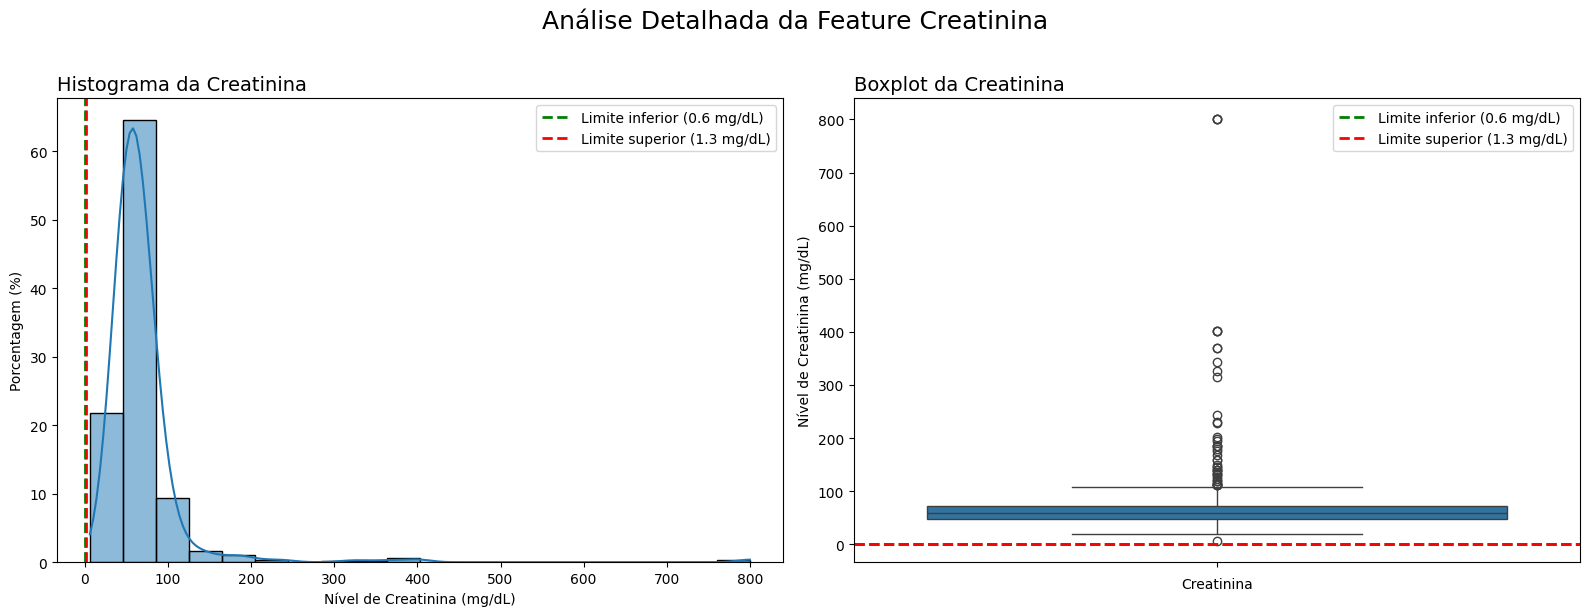

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linhas de Referência
sns.histplot(data_without_duplicates['Cr'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma da Creatinina', fontsize=14, loc='left')
axes[0].set_xlabel('Nível de Creatinina (mg/dL)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando a linha vertical para o limite normal (0.6)
axes[0].axvline(x=0.6, color='green', linestyle='--', linewidth=2, label='Limite inferior (0.6 mg/dL)')
# Adicionando a linha vertical para o limite elevado (1.3)
axes[0].axvline(x=1.3, color='red', linestyle='--', linewidth=2, label='Limite superior (1.3 mg/dL)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['Cr'], ax=axes[1])
axes[1].set_title('Boxplot da Creatinina', fontsize=14, loc='left')
axes[1].set_ylabel('Nível de Creatinina (mg/dL)')
axes[1].set_xlabel('Creatinina')

# Adicionando os limites para a Creatinina no boxplot
axes[1].axhline(y=0.6, color='green', linestyle='--', linewidth=2, label='Limite inferior (0.6 mg/dL)')
axes[1].axhline(y=1.3, color='red', linestyle='--', linewidth=2, label='Limite superior (1.3 mg/dL)')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature Creatinina', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [39]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['Cr'], 'Cr')

--- Análise de Normalidade para a Feature: 'Cr' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.3959
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 1193.8153
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature Chol (cholesterol)

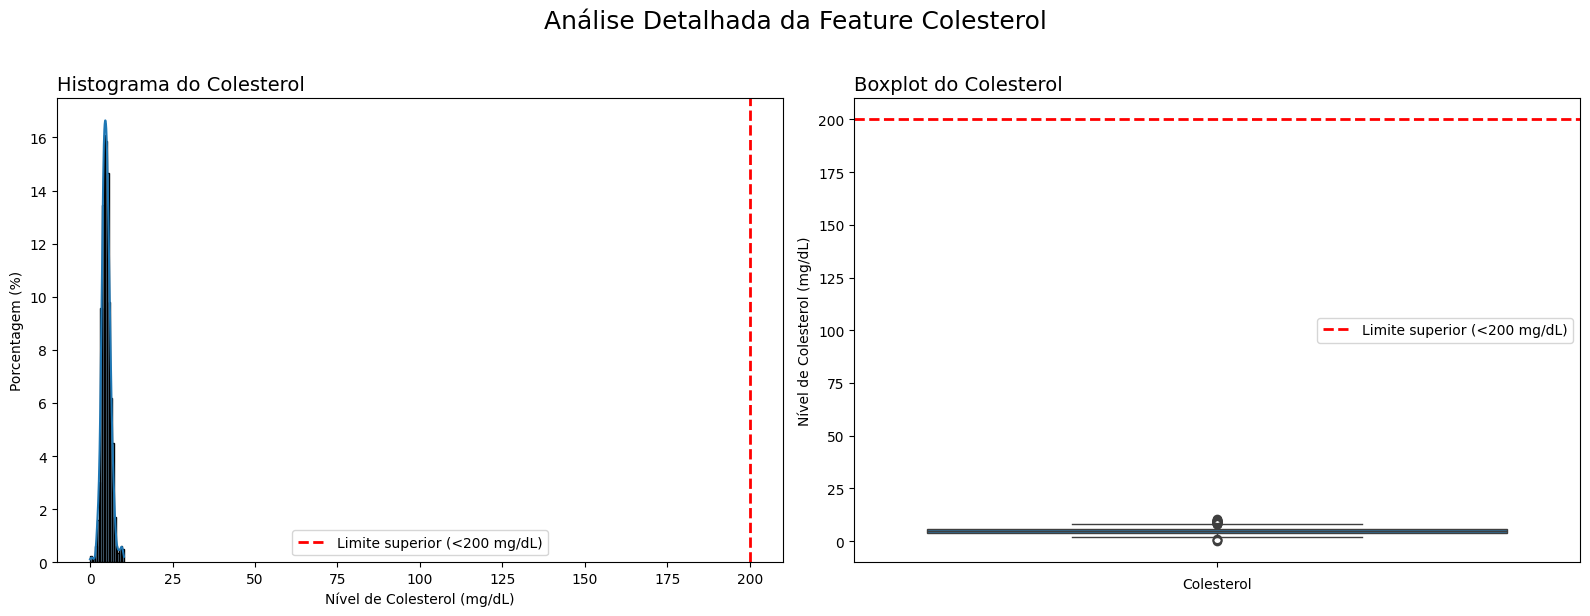

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linha de Referência
sns.histplot(data_without_duplicates['Chol'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma do Colesterol', fontsize=14, loc='left')
axes[0].set_xlabel('Nível de Colesterol (mg/dL)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando a linha vertical para o limite superior (Normal < 200 mg/dL)
axes[0].axvline(x=200, color='red', linestyle='--', linewidth=2, label='Limite superior (<200 mg/dL)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['Chol'], ax=axes[1])
axes[1].set_title('Boxplot do Colesterol', fontsize=14, loc='left')
axes[1].set_ylabel('Nível de Colesterol (mg/dL)')
axes[1].set_xlabel('Colesterol')

# Adicionando o limite para o Colesterol no boxplot
axes[1].axhline(y=200, color='red', linestyle='--', linewidth=2, label='Limite superior (<200 mg/dL)')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature Colesterol', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [41]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['Chol'], 'Chol')

--- Análise de Normalidade para a Feature: 'Chol' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.9726
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 74.4029
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature TG (triglicerídeos)

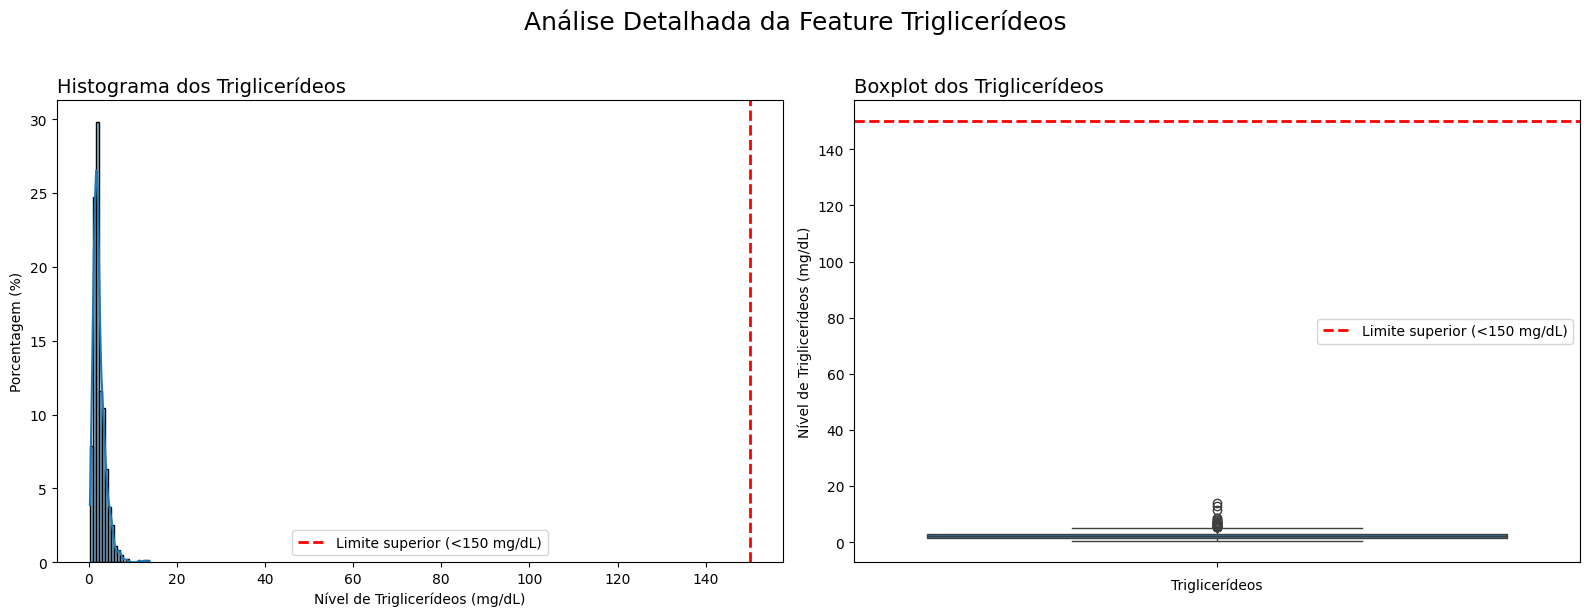

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
### Feature TG (triglicerídeos)
# Histograma com Linha de Referência
sns.histplot(data_without_duplicates['TG'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma dos Triglicerídeos', fontsize=14, loc='left')
axes[0].set_xlabel('Nível de Triglicerídeos (mg/dL)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando a linha vertical para o limite elevado (150)
axes[0].axvline(x=150, color='red', linestyle='--', linewidth=2, label='Limite superior (<150 mg/dL)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['TG'], ax=axes[1])
axes[1].set_title('Boxplot dos Triglicerídeos', fontsize=14, loc='left')
axes[1].set_ylabel('Nível de Triglicerídeos (mg/dL)')
axes[1].set_xlabel('Triglicerídeos')

# Adicionando o limite para os Triglicerídeos no boxplot
axes[1].axhline(y=150, color='red', linestyle='--', linewidth=2, label='Limite superior (<150 mg/dL)')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature Triglicerídeos', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [43]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['TG'], 'TG')

--- Análise de Normalidade para a Feature: 'TG' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.8325
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 448.0801
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature HDL

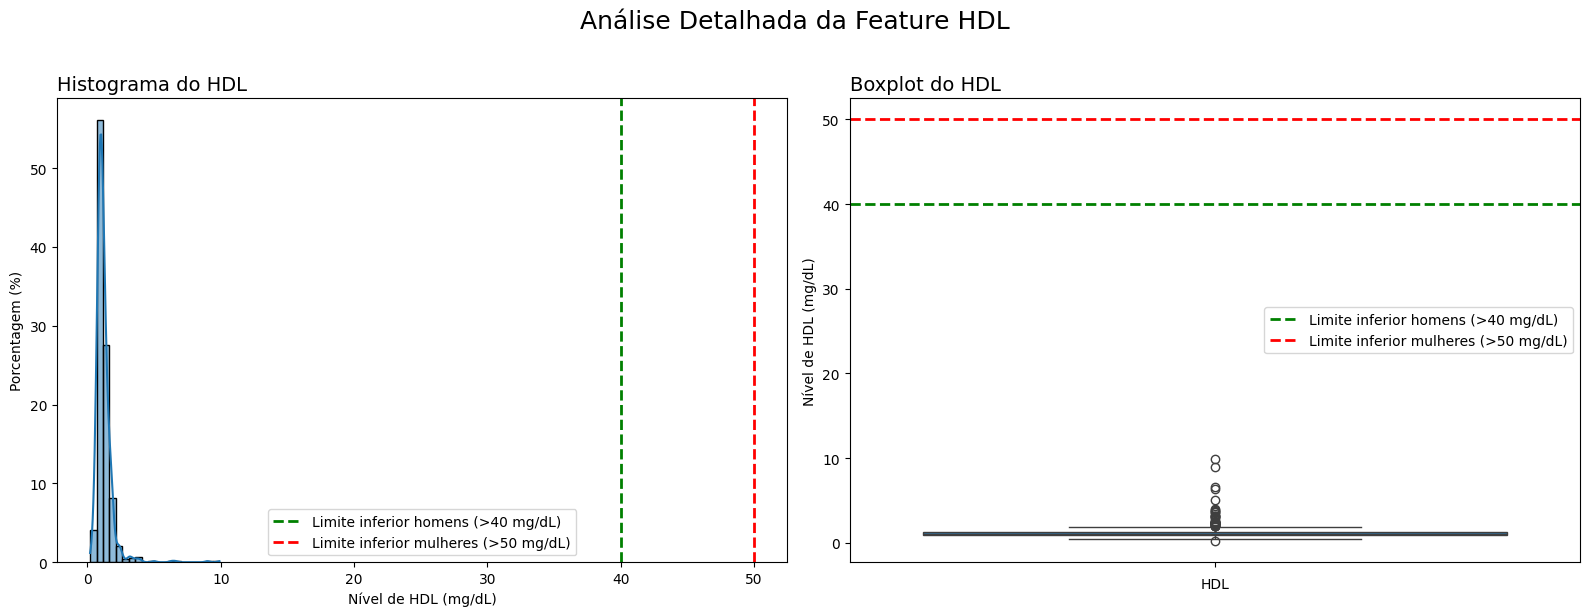

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linhas de Referência
sns.histplot(data_without_duplicates['HDL'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma do HDL', fontsize=14, loc='left')
axes[0].set_xlabel('Nível de HDL (mg/dL)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando a linha vertical para o limite mínimo homens (40)
axes[0].axvline(x=40, color='green', linestyle='--', linewidth=2, label='Limite inferior homens (>40 mg/dL)')
# Adicionando a linha vertical para o limite mínimo mulheres (50)
axes[0].axvline(x=50, color='red', linestyle='--', linewidth=2, label='Limite inferior mulheres (>50 mg/dL)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['HDL'], ax=axes[1])
axes[1].set_title('Boxplot do HDL', fontsize=14, loc='left')
axes[1].set_ylabel('Nível de HDL (mg/dL)')
axes[1].set_xlabel('HDL')

# Adicionando os limites para o HDL no boxplot
axes[1].axhline(y=40, color='green', linestyle='--', linewidth=2, label='Limite inferior homens (>40 mg/dL)')
axes[1].axhline(y=50, color='red', linestyle='--', linewidth=2, label='Limite inferior mulheres (>50 mg/dL)')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature HDL', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [45]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['HDL'], 'HDL')

--- Análise de Normalidade para a Feature: 'HDL' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.5676
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 1028.6222
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature LDL (low-density lipoprotein)

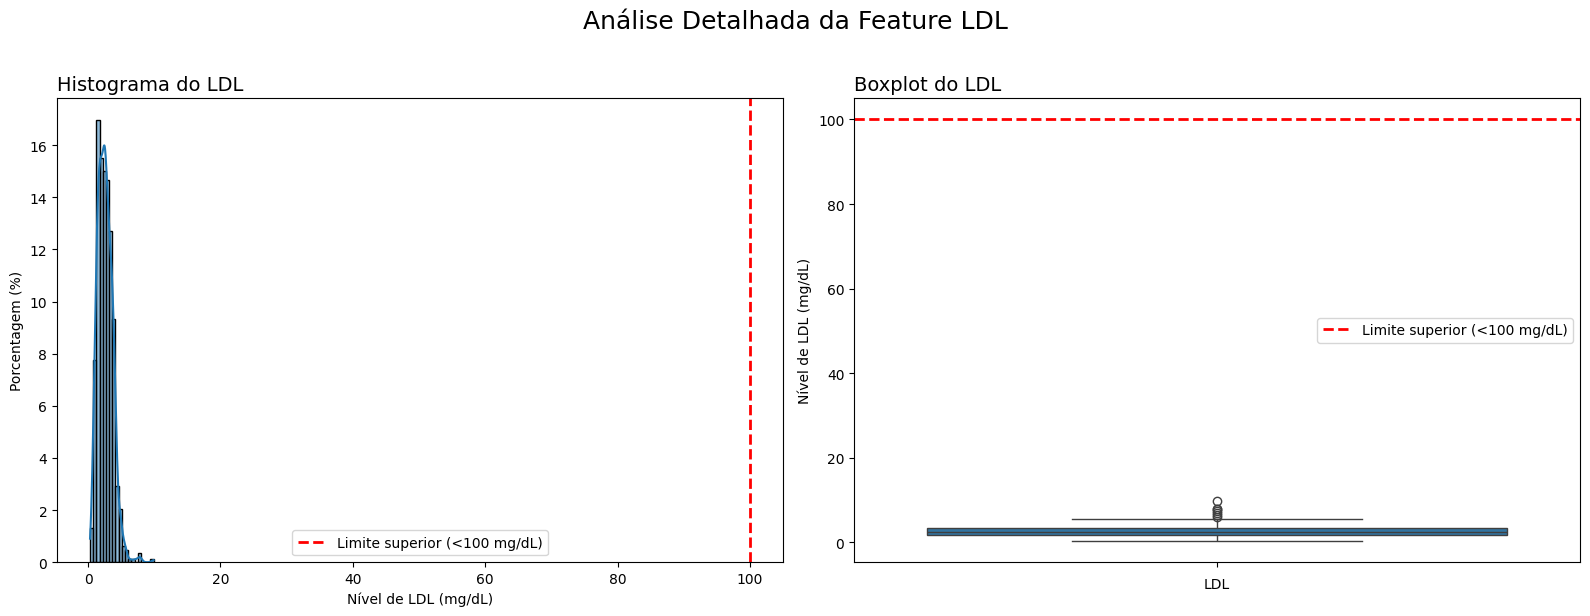

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linha de Referência
sns.histplot(data_without_duplicates['LDL'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma do LDL', fontsize=14, loc='left')
axes[0].set_xlabel('Nível de LDL (mg/dL)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando a linha vertical para o limite elevado (100)
axes[0].axvline(x=100, color='red', linestyle='--', linewidth=2, label='Limite superior (<100 mg/dL)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['LDL'], ax=axes[1])
axes[1].set_title('Boxplot do LDL', fontsize=14, loc='left')
axes[1].set_ylabel('Nível de LDL (mg/dL)')
axes[1].set_xlabel('LDL')

# Adicionando o limite para o LDL no boxplot
axes[1].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Limite superior (<100 mg/dL)')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature LDL', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [47]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['LDL'], 'LDL')

--- Análise de Normalidade para a Feature: 'LDL' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.9499
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 163.9055
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature VLDL (Very-low-density lipoprotein)

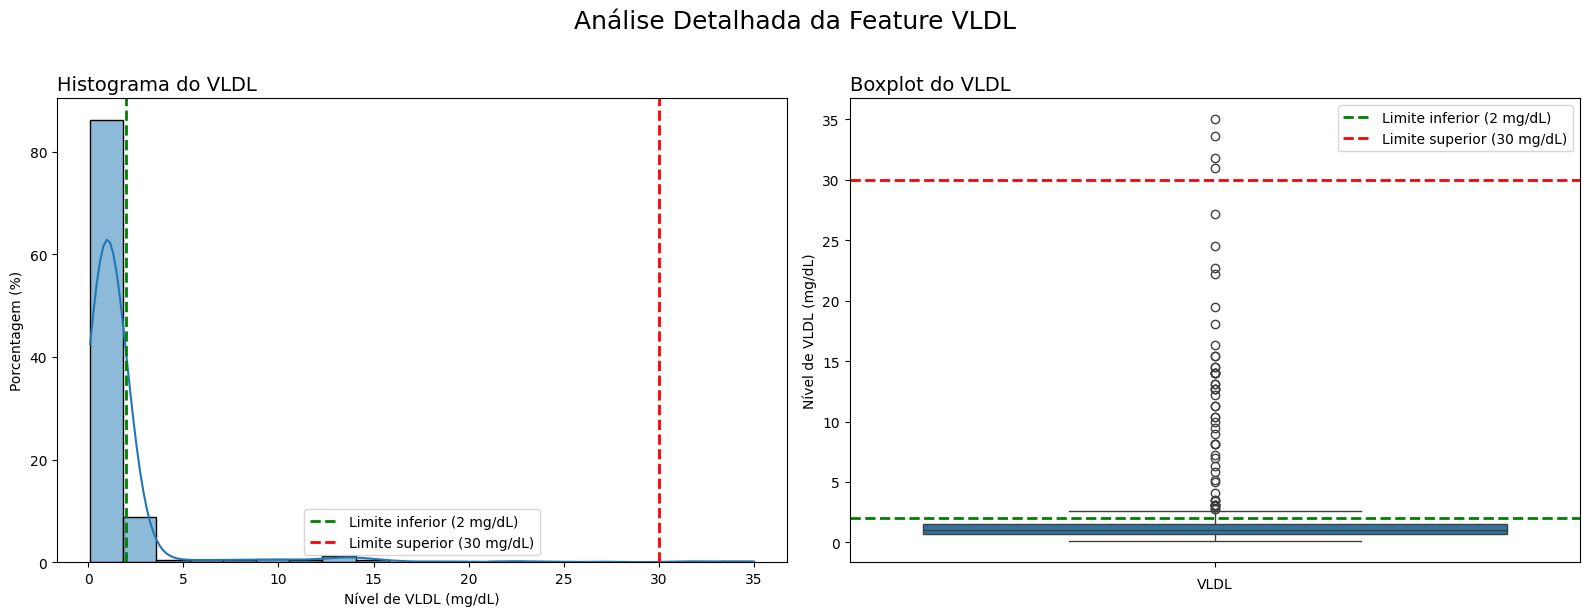

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linhas de Referência
sns.histplot(data_without_duplicates['VLDL'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma do VLDL', fontsize=14, loc='left')
axes[0].set_xlabel('Nível de VLDL (mg/dL)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando a linha vertical para o limite mínimo (2)
axes[0].axvline(x=2, color='green', linestyle='--', linewidth=2, label='Limite inferior (2 mg/dL)')
# Adicionando a linha vertical para o limite elevado (30)
axes[0].axvline(x=30, color='red', linestyle='--', linewidth=2, label='Limite superior (30 mg/dL)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['VLDL'], ax=axes[1])
axes[1].set_title('Boxplot do VLDL', fontsize=14, loc='left')
axes[1].set_ylabel('Nível de VLDL (mg/dL)')
axes[1].set_xlabel('VLDL')

# Adicionando os limites para o VLDL no boxplot
axes[1].axhline(y=2, color='green', linestyle='--', linewidth=2, label='Limite inferior (2 mg/dL)')
axes[1].axhline(y=30, color='red', linestyle='--', linewidth=2, label='Limite superior (30 mg/dL)')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature VLDL', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [49]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['VLDL'], 'VLDL')

--- Análise de Normalidade para a Feature: 'VLDL' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.3260
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 958.1405
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature BMI (Body Mass Index)

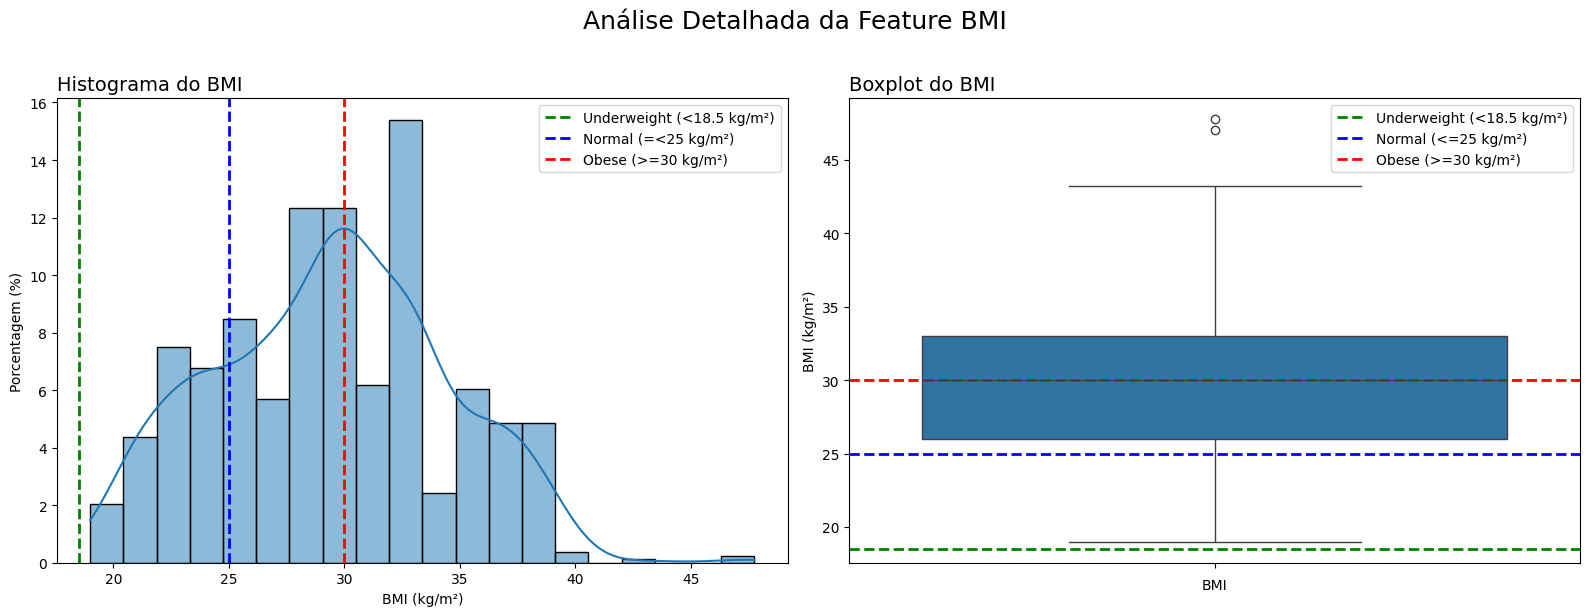

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma com Linhas de Referência
sns.histplot(data_without_duplicates['BMI'], kde=True, ax=axes[0], bins=20, stat='percent')
axes[0].set_title('Histograma do BMI', fontsize=14, loc='left')
axes[0].set_xlabel('BMI (kg/m²)')
axes[0].set_ylabel('Porcentagem (%)')

# Adicionando as linhas verticais para as categorias do BMI
axes[0].axvline(x=18.5, color='green', linestyle='--', linewidth=2, label='Underweight (<18.5 kg/m²)')
axes[0].axvline(x=25, color='blue', linestyle='--', linewidth=2, label='Normal (=<25 kg/m²)')
axes[0].axvline(x=30, color='red', linestyle='--', linewidth=2, label='Obese (>=30 kg/m²)')
axes[0].legend()

# Boxplot
sns.boxplot(y=data_without_duplicates['BMI'], ax=axes[1])
axes[1].set_title('Boxplot do BMI', fontsize=14, loc='left')
axes[1].set_ylabel('BMI (kg/m²)')
axes[1].set_xlabel('BMI')

# Adicionando os limites para o BMI no boxplot
axes[1].axhline(y=18.5, color='green', linestyle='--', linewidth=2, label='Underweight (<18.5 kg/m²)')
axes[1].axhline(y=25, color='blue', linestyle='--', linewidth=2, label='Normal (<=25 kg/m²)')
axes[1].axhline(y=30, color='red', linestyle='--', linewidth=2, label='Obese (>=30 kg/m²)')
axes[1].legend()

plt.suptitle('Análise Detalhada da Feature BMI', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [51]:
# Análise da normalidade da feature

verificar_normalidade(data_without_duplicates['BMI'], 'BMI')

--- Análise de Normalidade para a Feature: 'BMI' ---

1. Teste de Shapiro-Wilk:
   - Estatística do teste = 0.9832
   - P-valor = 0.0000
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).

2. Teste de D'Agostino's K-squared:
   - Estatística do teste = 10.7676
   - P-valor = 0.0046
   - Conclusão (alpha=0.05): A hipótese de normalidade é rejeitada (Não Normal).
--------------------------------------------------



### Feature Gender

In [52]:
class_map = {0: 'Female', 1: 'Male'}

df = data_without_duplicates['Gender'].map(class_map)
df.rename('gender_label', inplace=True)
order_by_label = df.value_counts().index

class_counts = df.value_counts()

class_percentages = df.value_counts(normalize=True) * 100
print(class_percentages)

gender_label
Male      56.053269
Female    43.946731
Name: proportion, dtype: float64


In [53]:
pd.DataFrame(df)['gender_label']

,gender_label
0,Female
1,Male
2,Male
3,Female
4,Female
...,...
821,Female
822,Male
823,Male
824,Male


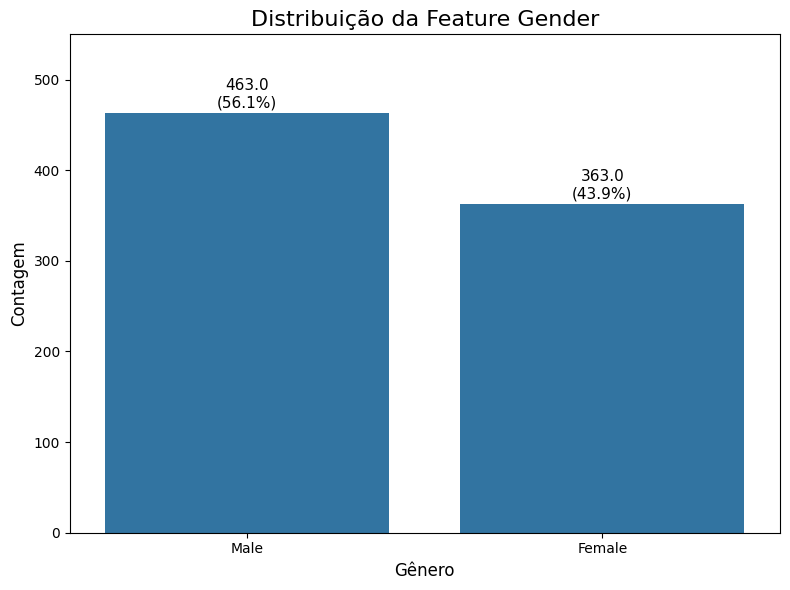

In [54]:
# Visualização da distribuição da feature
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender_label', data=pd.DataFrame(df), order=order_by_label)

plt.title('Distribuição da Feature Gender', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.ylim(0, 550)

# adicionando rotulos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height}\n({height/len(data_without_duplicates)*100:.1f}%)',
            ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()

## Análise da variável resposta

In [55]:
class_map = {0: 'Diabético', 1: 'Não-Diabético', 2: 'Pré-Diabético'}
data_without_duplicates['CLASS_label'] = data_without_duplicates['CLASS'].map(class_map)

order_by_label = data_without_duplicates['CLASS_label'].value_counts().index
class_counts = data_without_duplicates['CLASS'].value_counts()

class_percentages = data_without_duplicates['CLASS'].value_counts(normalize=True) * 100
print(class_percentages)

CLASS
0    83.535109
1    11.622276
2     4.842615
Name: proportion, dtype: float64


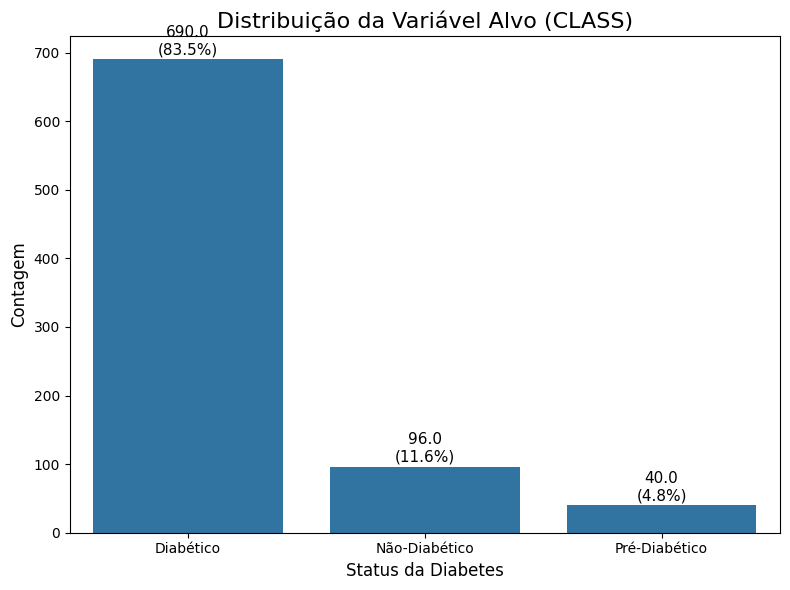

In [56]:
# Visualização da distribuição da variável alvo
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CLASS_label', data=data_without_duplicates, order=order_by_label)

plt.title('Distribuição da Variável Alvo (CLASS)', fontsize=16)
plt.xlabel('Status da Diabetes', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# O código para adicionar os rótulos nas barras permanece o mesmo
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height}\n({height/len(data_without_duplicates)*100:.1f}%)',
            ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()

## Análise multivariada

### Matriz de correlação

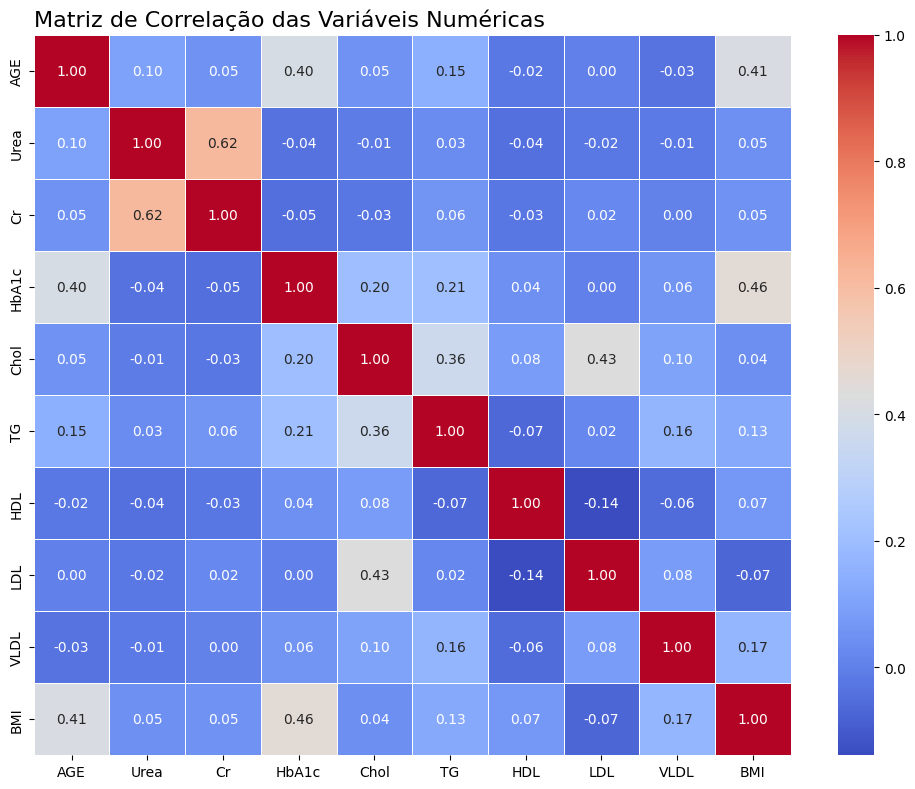

In [57]:
correlation_matrix = data_without_duplicates[num_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Exibe os valores de correlação nas células
    cmap='coolwarm',     # Esquema de cores (azul para negativo, vermelho para positivo)
    fmt='.2f',           # Formata os números para duas casas decimais
    linewidths=.5        # Adiciona linhas finas entre as células
)

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16, loc='left')

plt.tight_layout()
plt.show()

### Análise das features por classe da variável alvo

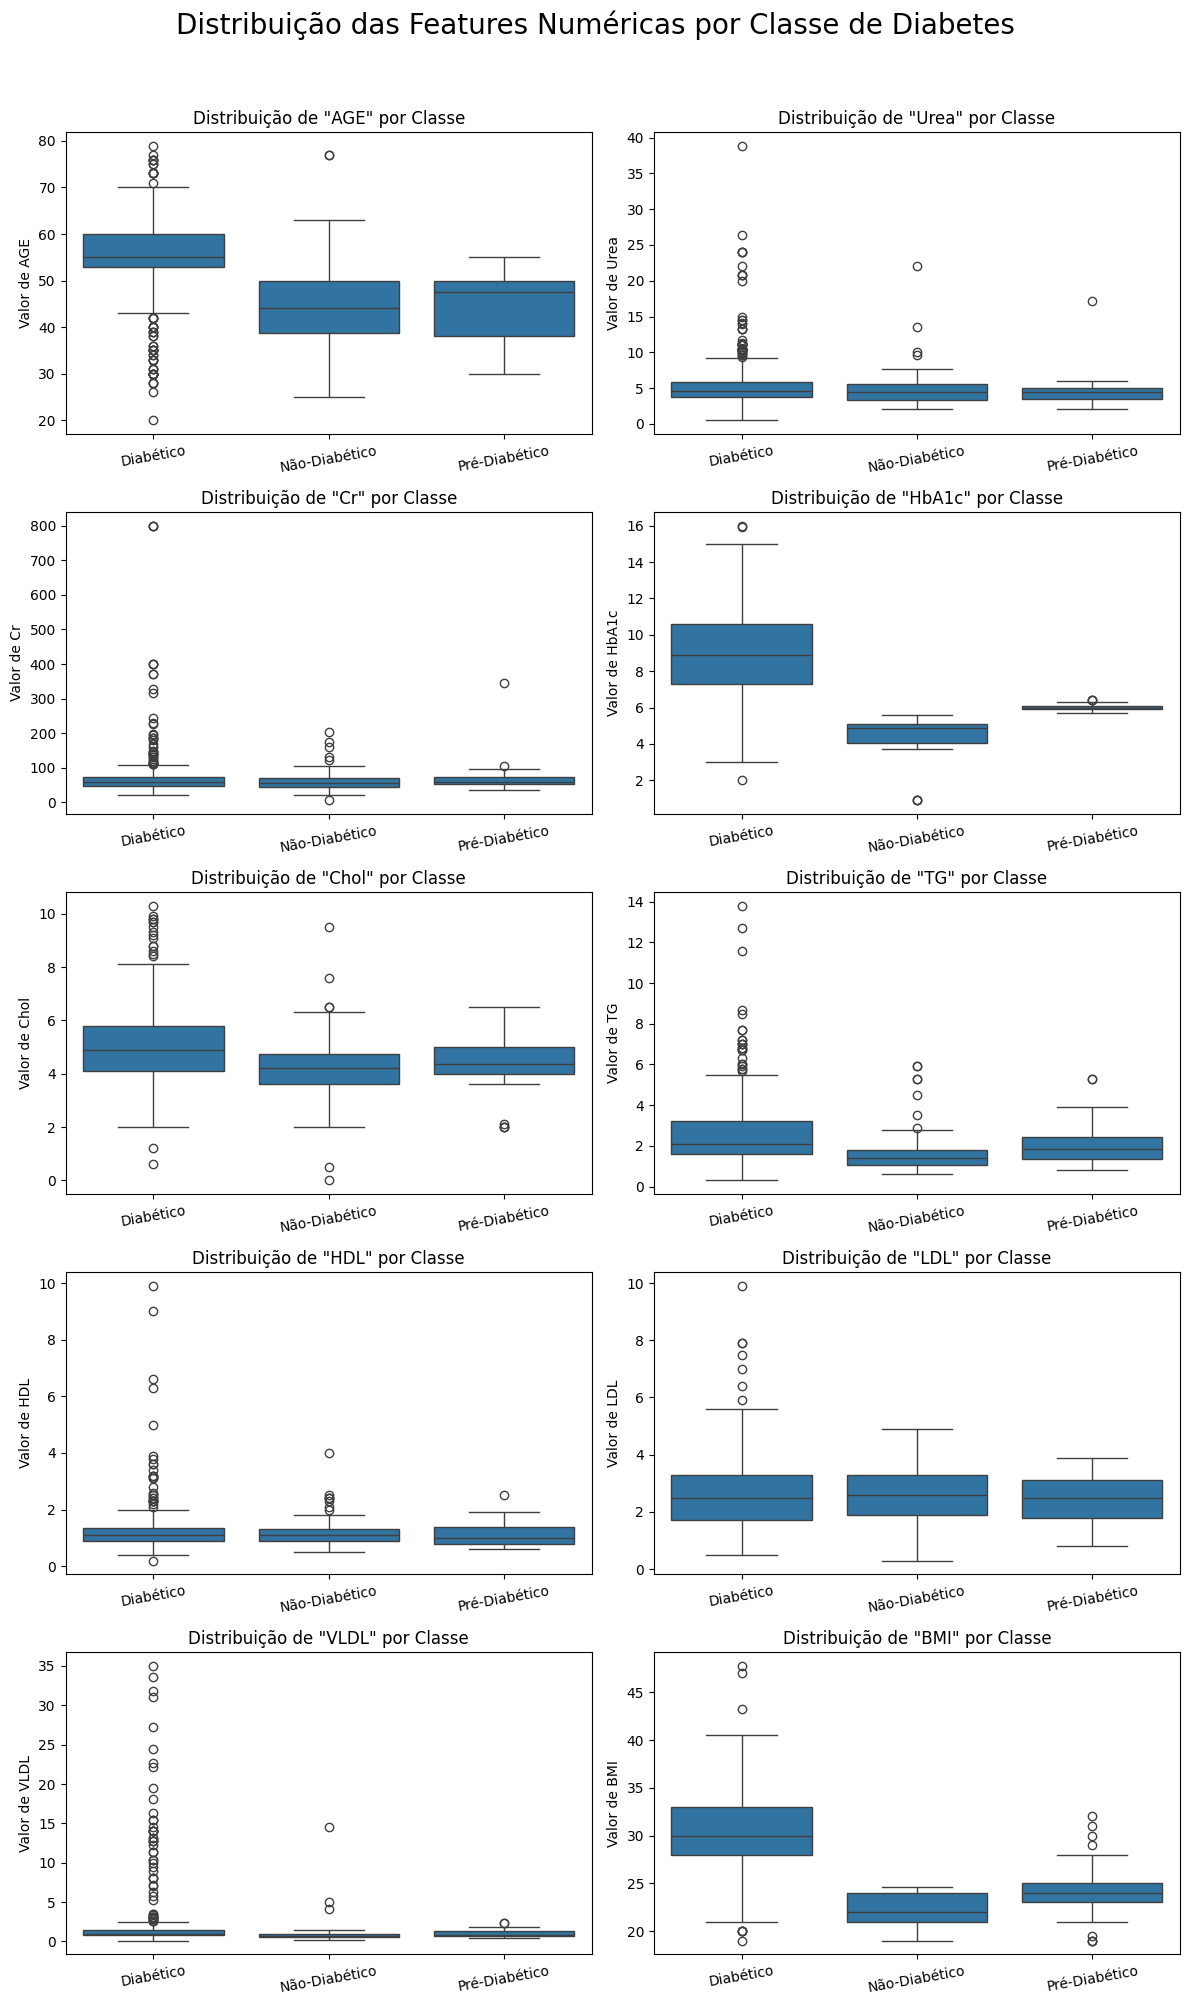

In [58]:
class_order = data_without_duplicates['CLASS_label'].value_counts().index

nrows, ncols = 5, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 20))

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

# Iterando sobre as features e os eixos simultaneamente
for i, col in enumerate(num_features):
    ax = axes[i] # Seleciona o eixo atual
    sns.boxplot(
        x='CLASS_label',
        y=col,
        data=data_without_duplicates,
        order=class_order,
        ax=ax # Especifica em qual eixo o gráfico deve ser desenhado
    )
    ax.set_title(f'Distribuição de "{col}" por Classe', fontsize=12)
    ax.set_xlabel('') # Remove o rótulo do eixo X para limpar a visualização
    ax.set_ylabel(f'Valor de {col}', fontsize=10)
    ax.tick_params(axis='x', rotation=10)

# Ocultando os eixos extras que não foram utilizados
for i in range(len(num_features), len(axes)):
    axes[i].axis('off')

# Adicionando um título geral para toda a figura
fig.suptitle('Distribuição das Features Numéricas por Classe de Diabetes', fontsize=20, y=1.0)

# Ajustando o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Gender x CLASS

In [59]:
data_without_duplicates['Gender_label'] = data_without_duplicates['Gender'].map({0: 'Female', 1: 'Male'})

# Criando a tabela de contingência
contingency_table = pd.crosstab(data_without_duplicates['Gender_label'], data_without_duplicates['CLASS_label'])

print("Tabela de Contingência: Gender vs. Class\n")
print(contingency_table)

Tabela de Contingência: Gender vs. Class

CLASS_label   Diabético  Não-Diabético  Pré-Diabético
Gender_label                                         
Female              292             58             13
Male                398             38             27



Tabela de Contingência (Percentual por Gênero):

CLASS_label   Diabético  Não-Diabético  Pré-Diabético
Gender_label                                         
Female        80.440771      15.977961       3.581267
Male          85.961123       8.207343       5.831533


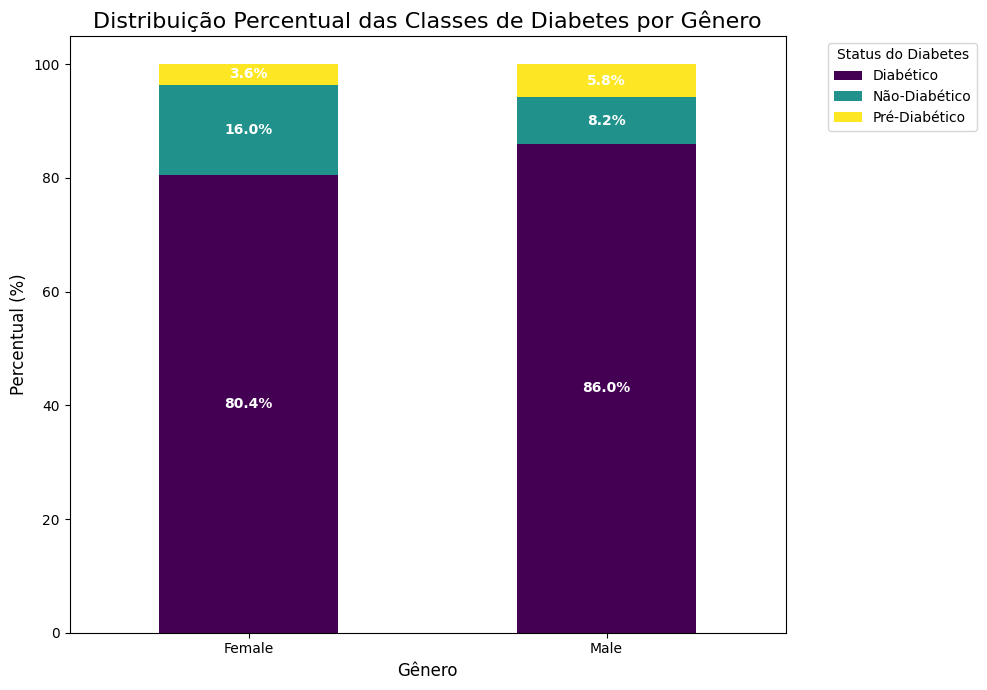

In [60]:
contingency_table_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\nTabela de Contingência (Percentual por Gênero):\n")
print(contingency_table_pct)

# Criando o gráfico de barras empilhadas 100%
ax = contingency_table_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7),
    colormap='viridis'
)

plt.title('Distribuição Percentual das Classes de Diabetes por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status do Diabetes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando os rótulos de porcentagem no gráfico
for c in ax.containers:
    # A formatação pode ser ajustada para melhor visualização
    labels = [f'{w:.1f}%' if w > 0 else '' for w in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', color='white', weight='bold')

plt.tight_layout()
plt.show()

In [61]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n--- Teste Qui-quadrado de Independência ---\n")
print(f"Estatística Qui-quadrado: {chi2:.4f}")
print(f"P-valor: {p_value:.4f}")
print(f"Graus de Liberdade (dof): {dof}")

alpha = 0.05
if p_value <= alpha:
    print(f"\nConclusão (alpha={alpha}): Rejeitamos a hipótese nula.")
    print("Há uma associação estatisticamente significativa entre Gênero e Classe de Diabetes.")
else:
    print(f"\nConclusão (alpha={alpha}): Falhamos em rejeitar a hipótese nula.")
    print("Não há evidência de uma associação estatisticamente significativa entre Gênero e Classe de Diabetes.")


--- Teste Qui-quadrado de Independência ---

Estatística Qui-quadrado: 13.4412
P-valor: 0.0012
Graus de Liberdade (dof): 2

Conclusão (alpha=0.05): Rejeitamos a hipótese nula.
Há uma associação estatisticamente significativa entre Gênero e Classe de Diabetes.


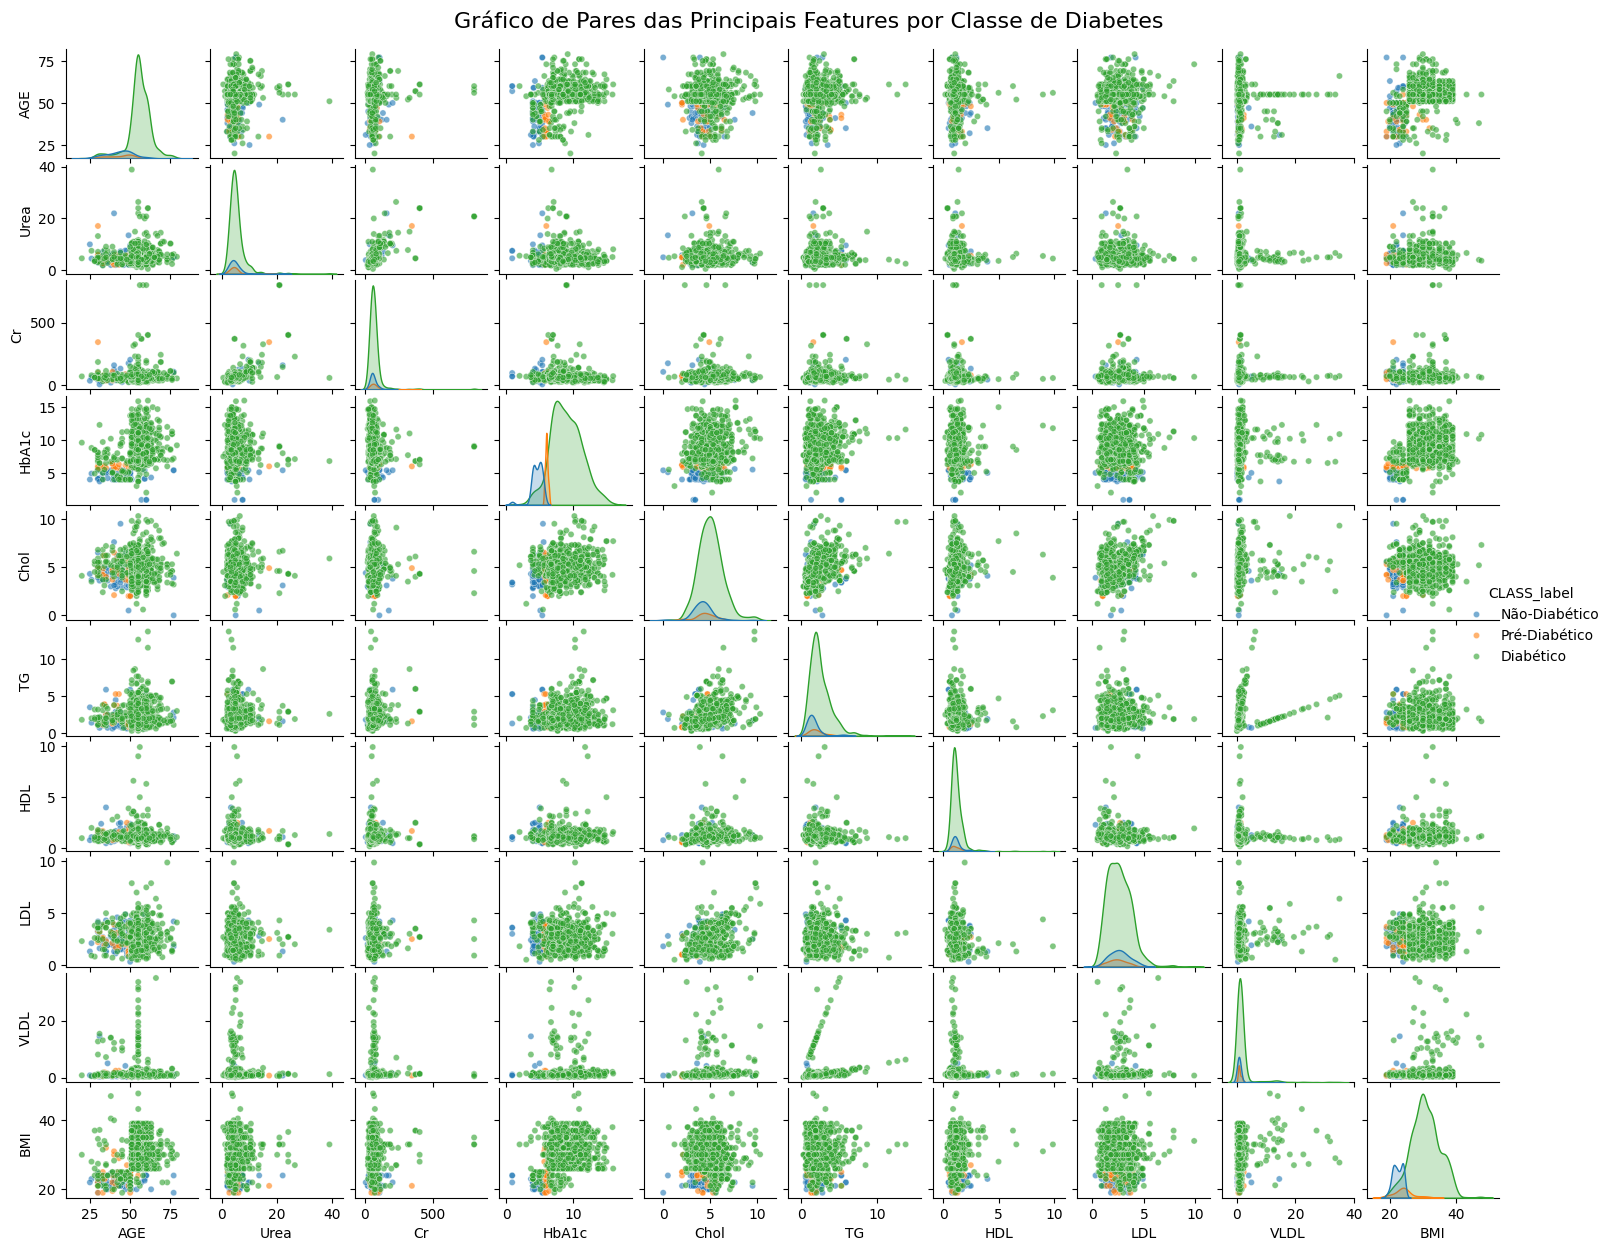

In [62]:
features_for_pairplot = num_features

# Criando o pair plot
# diag_kind='kde' mostra a densidade da distribuição na diagonal
g = sns.pairplot(
    data=data_without_duplicates,
    vars=features_for_pairplot,
    hue='CLASS_label',
    #palette='viridis', # Esquema de cores
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 20} # Ajusta a transparência e o tamanho dos pontos
)

g.fig.set_size_inches(16, 12)

# Adicionando um título geral
g.fig.suptitle('Gráfico de Pares das Principais Features por Classe de Diabetes', y=1.02, fontsize=16)

plt.show()

In [72]:
# Valores possiveis - Gender
df['Gender'].unique()

array([0, 1])

In [73]:
# Quantidade de registros por genero
df['Gender'].value_counts()

,count
Gender,
1,565
0,435


[Text(0, 0, '565'), Text(0, 0, '435')]

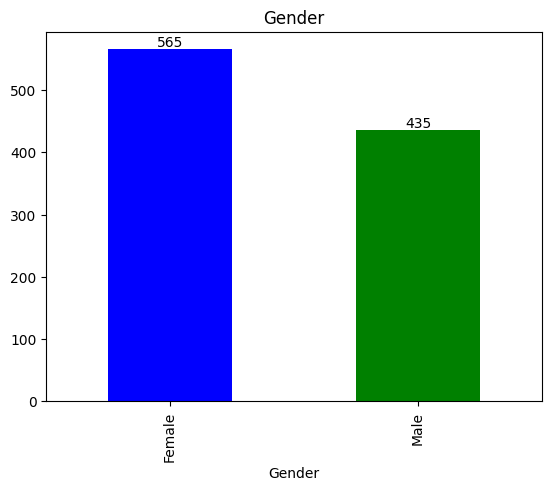

In [74]:
# Mostrando graficamente a distribuição de homens e mulheres no dataset
# 0 -> Female
# 1 -> Male
ax = df['Gender'].value_counts().plot(kind='bar', title='Gender', color=['blue', 'green'])
# vamos adicionar o rotulo trocando de 1 e 0 para Male ou Female
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
ax.bar_label(ax.containers[0])

In [75]:
# Valores possiveis - Class
df['Class'].unique()

# 0 -> Non-diabetic
# 1 -> Diabetic
# 2 -> Predict-diabetic

KeyError: 'Class'

In [ ]:
# Distribuição da variavel Class (Target)
df['Class'].value_counts().plot(kind='bar')

In [ ]:
# Explorando a quantidade de registros por idade
df['AGE'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))

In [ ]:
# Histograma da Idade
df.hist(figsize=(12,8))

In [ ]:
# Verifica a correlação entre as variaveis
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmax=1, vmin=-1, cbar_kws={"shrink": .8})

In [ ]:
# PCA 2D para visualização (depois de padronizar)
scaler = StandardScaler()
X = df.drop(['Class'], axis=1)
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X_pca2 = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
palette = {0: "red", 1: "green"}
for cls in np.unique(y):
    plt.scatter(X_pca2[y==cls, 0], X_pca2[y==cls, 1], label=f"class {cls} {{data.target_names[cls]}}", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D (padronizado) - visualização da separabilidade")
plt.legend()
plt.show()

## Analise de Outliers

In [76]:
# carregando as variaveis para o pllot
variaveis_numericas = []
for i in df.columns.to_list():
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        variaveis_numericas.append(i)

In [77]:
variaveis_numericas

['Gender',
 'AGE',
 'Urea',
 'Cr',
 'HbA1c',
 'Chol',
 'TG',
 'HDL',
 'LDL',
 'VLDL',
 'BMI',
 'CLASS']

In [78]:
num_linhas = len(variaveis_numericas)
# agora pegaremos o num_linhas e dividiremos por 2 e arredondaremos para cima para termos o numero de linhas
num_linhas = (num_linhas + 1) // 2 if num_linhas % 2 == 0 else (num_linhas // 2) + 1
print(f"Numero de Linhas: {num_linhas}")

Numero de Linhas: 6


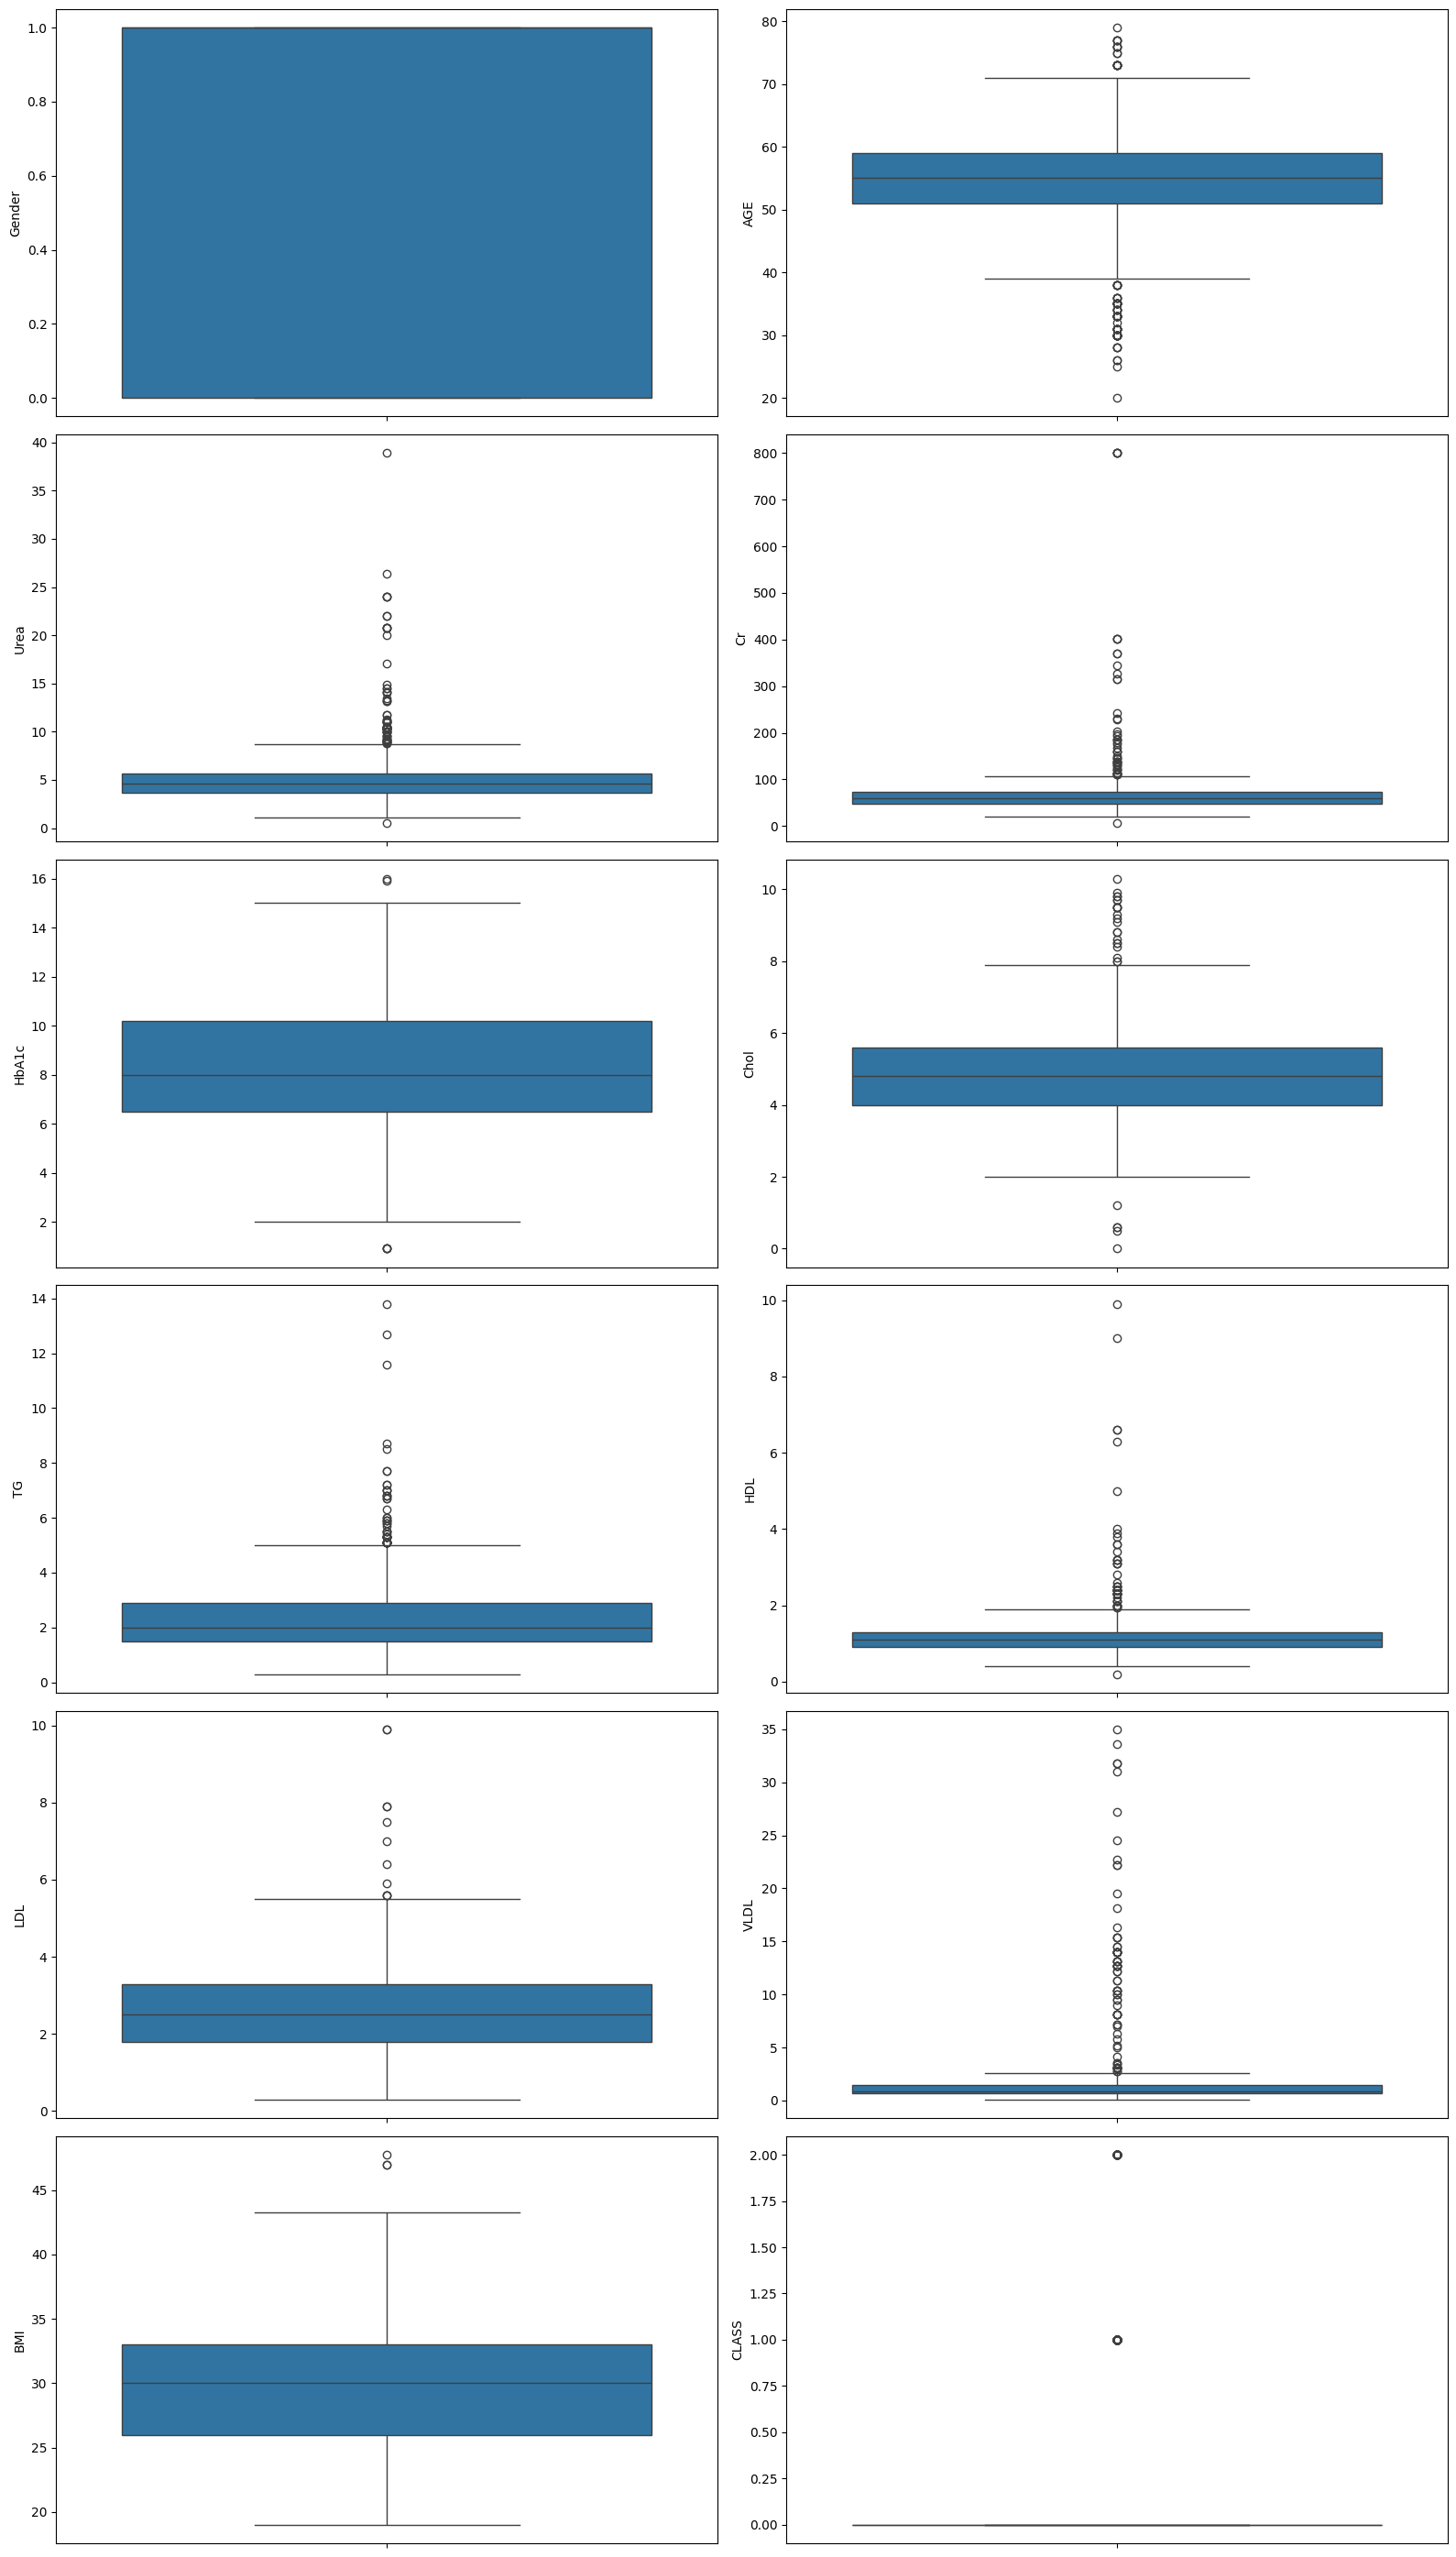

In [79]:
# Montando o gráfico para analise de outliers

plt.rcParams['figure.figsize'] = (16, 28)
plt.rcParams['figure.autolayout'] = True
# definindo 3 linhas e 2 colunas
f, axes = plt.subplots(num_linhas, 2)

lin = 0
col = 0

for i in variaveis_numericas:
    sns.boxplot(data=df, y=i, ax=axes[lin, col])
    col += 1
    if col == 2:
        col = 0
        lin += 1

plt.show()

In [80]:
# Criando função para identificação de outliers
def identifica_outliers(df_outlier, coluna):
    Q1 = df_outlier[coluna].quantile(0.25)
    Q3 = df_outlier[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df_outlier[(df_outlier[coluna] < limite_inferior) | (df_outlier[coluna] > limite_superior)]
    return outliers

In [81]:
# Ouliers na variavel AGE
outliers_age = identifica_outliers(df, 'AGE')
outliers_age

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1
9,0,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,1
10,0,31,4.4,55,4.2,3.6,0.7,1.7,1.6,0.3,23.0,1
11,0,33,3.3,53,4.0,4.0,1.1,0.9,2.7,1.0,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
985,0,75,10.3,113,8.6,4.2,1.6,0.9,2.6,0.7,32.0,0
993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,0
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,0
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,0


In [82]:
# Ouliers na variavel Urea
outliers_urea = identifica_outliers(df, 'Urea')
outliers_urea

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
20,0,49,13.5,175,5.1,0.5,1.9,1.3,2.8,0.8,24.0,1
86,0,25,10.0,35,4.0,4.3,3.5,0.8,1.3,0.8,22.0,1
91,1,50,9.6,203,5.4,3.8,5.9,0.5,4.3,1.3,22.0,1
95,1,40,22.0,159,5.4,3.1,1.6,1.1,1.3,0.7,24.0,1
151,1,30,17.1,344,6.0,4.9,1.6,1.7,2.5,0.7,21.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
977,1,69,10.3,185,7.6,4.6,3.2,0.6,2.7,1.4,33.0,0
983,1,64,8.8,106,8.5,5.9,2.1,1.2,4.0,1.2,32.0,0
985,0,75,10.3,113,8.6,4.2,1.6,0.9,2.6,0.7,32.0,0
994,1,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,0


In [83]:
# Ouliers na variavel Cr
outliers_cr = identifica_outliers(df, 'Cr')
outliers_cr

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
20,0,49,13.5,175,5.1,0.5,1.9,1.3,2.8,0.8,24.0,1
69,0,31,3.9,6,5.4,4.4,1.8,1.1,2.6,0.8,22.0,1
87,0,40,5.8,123,4.5,4.6,1.5,0.7,3.0,0.6,24.0,1
91,1,50,9.6,203,5.4,3.8,5.9,0.5,4.3,1.3,22.0,1
94,0,44,7.3,132,4.3,5.2,1.9,2.5,3.0,0.7,21.0,1
95,1,40,22.0,159,5.4,3.1,1.6,1.1,1.3,0.7,24.0,1
151,1,30,17.1,344,6.0,4.9,1.6,1.7,2.5,0.7,21.0,2
208,1,57,4.6,370,6.8,4.0,6.0,2.5,3.5,1.1,37.0,0
212,1,57,4.6,370,6.8,6.1,6.0,2.5,3.5,1.1,37.0,0
273,1,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,0


In [84]:
# Ouliers na variavel HbA1c
outliers_hba1c = identifica_outliers(df, 'HbA1c')
outliers_hba1c

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
80,0,57,4.6,97,0.9,3.2,1.3,0.9,3.0,1.1,22.0,1
92,0,60,7.5,70,0.9,3.4,5.3,1.1,3.6,0.8,24.0,1
98,1,60,7.5,70,0.9,3.4,5.3,1.1,3.6,0.8,24.0,1
101,0,57,4.6,97,0.9,3.2,1.3,0.9,3.0,1.1,22.0,1
805,1,55,5.1,39,15.9,4.2,1.2,1.4,3.0,2.0,38.0,0
897,0,61,8.1,72,16.0,7.7,3.1,1.6,4.9,1.4,26.0,0


In [85]:
# Ouliers na variavel Chol
outliers_chol = identifica_outliers(df, 'Chol')
outliers_chol

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
20,0,49,13.5,175,5.1,0.5,1.9,1.30,2.8,0.8,24.00,1
41,0,44,3.0,39,5.5,9.5,1.7,1.30,2.5,0.6,21.00,1
48,0,44,3.0,39,5.5,9.5,1.7,1.30,2.5,0.6,21.00,1
99,1,77,5.0,106,5.4,0.0,2.8,0.80,1.8,0.7,19.00,1
176,0,54,3.0,39,7.2,9.5,1.7,1.30,2.5,0.6,22.00,0
177,0,54,3.0,39,7.2,9.5,1.7,1.30,2.5,0.6,22.00,0
342,1,58,4.8,60,5.5,0.6,2.5,1.10,2.0,0.6,38.00,0
345,1,58,4.8,60,5.5,0.6,2.5,1.10,2.0,0.6,38.00,0
412,0,52,6.4,88,8.5,8.5,0.8,6.60,1.3,1.3,33.00,0
415,0,52,6.4,88,8.5,8.5,0.8,6.60,1.3,1.3,33.00,0


In [86]:
# Ouliers na variavel TG
outliers_tg = identifica_outliers(df, 'TG')
outliers_tg

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
64,0,35,3.9,38,5.4,3.8,5.9,0.50,4.30,1.0,22.00,1
91,1,50,9.6,203,5.4,3.8,5.9,0.50,4.30,1.3,22.00,1
92,0,60,7.5,70,0.9,3.4,5.3,1.10,3.60,0.8,24.00,1
98,1,60,7.5,70,0.9,3.4,5.3,1.10,3.60,0.8,24.00,1
108,0,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.00,2
149,1,41,5.9,62,5.9,4.7,5.3,0.90,1.70,2.4,21.00,2
208,1,57,4.6,370,6.8,4.0,6.0,2.50,3.50,1.1,37.00,0
212,1,57,4.6,370,6.8,6.1,6.0,2.50,3.50,1.1,37.00,0
302,1,66,4.1,63,10.1,3.6,5.1,0.90,2.50,0.9,30.00,0
315,1,54,5.5,69,11.0,6.3,6.8,0.70,2.40,3.1,29.00,0


In [ ]:
# Ouliers na variavel HDL
outliers_hdl = identifica_outliers(df, 'HDL')
outliers_hdl

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
6,1,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,0
7,0,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,0
48,0,50,4.4,69,5.0,3.9,0.7,2.3,0.3,0.4,24.0,0
54,0,48,2.8,55,5.0,3.6,0.6,2.1,1.2,0.2,23.5,0
57,1,44,6.8,64,4.9,4.9,2.8,2.0,1.8,1.2,21.0,0
70,0,35,3.3,44,5.0,4.1,1.9,4.0,1.3,0.7,23.0,0
88,0,44,7.3,132,4.3,5.2,1.9,2.5,3.0,0.7,21.0,0
135,0,48,5.6,79,6.3,4.2,1.2,2.5,2.7,1.4,27.0,1
162,0,68,4.2,41,11.9,4.0,1.1,2.3,1.1,0.5,30.0,2


In [ ]:
# Ouliers na variavel LDL
outliers_hdl = identifica_outliers(df, 'LDL')
outliers_hdl

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
222,1,55,4.66,70,7.5,7.3,1.6,1.2,5.5,11.3,36.11,2
235,1,68,7.40,98,12.9,8.8,4.5,1.1,5.6,2.1,29.00,2


In [ ]:
# Ouliers na variavel VLDL
outliers_vldl = identifica_outliers(df, 'VLDL')
outliers_vldl

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
28,1,47,4.60,55,4.3,4.60,0.8,0.90,4.2,4.1,24.00,0
29,1,36,3.80,70,5.0,3.60,0.7,1.30,1.9,5.0,22.00,0
41,1,31,3.60,67,3.7,4.30,2.1,1.00,2.4,14.5,23.00,0
99,0,43,2.10,55,5.7,4.70,5.3,0.90,1.7,2.4,25.00,1
129,1,41,5.90,62,5.9,4.70,5.3,0.90,1.7,2.4,21.00,1
175,1,55,4.16,30,6.8,6.12,3.5,1.03,3.6,24.5,27.33,2
201,1,33,3.30,76,9.7,2.40,1.9,0.80,2.5,13.1,21.17,2
211,1,40,7.10,74,7.5,4.40,1.4,1.30,2.5,10.0,28.30,2
222,1,55,4.66,70,7.5,7.30,1.6,1.20,5.5,11.3,36.11,2
234,1,55,6.66,73,10.9,3.50,3.2,0.90,1.3,22.2,43.25,2


In [ ]:
# Analisando os dados do dataframe referente a classe 2 para tentar identificar padrões
df[ df['Class'] == 2 ].describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,0.617188,55.375000,6.721719,107.937500,8.841875,4.938438,2.525000,1.178750,2.511328,2.009375,30.620234,2.0
std,0.487983,7.770325,4.943201,134.570401,2.171434,1.334312,1.335464,0.433386,1.053906,4.185999,4.196717,0.0
min,0.000000,26.000000,1.100000,20.000000,3.700000,2.000000,0.600000,0.400000,0.750000,0.200000,20.000000,2.0
25%,0.000000,54.000000,4.075000,44.000000,7.200000,4.000000,1.600000,0.900000,1.600000,0.800000,27.832500,2.0
50%,1.000000,55.000000,5.050000,70.000000,8.400000,4.850000,2.000000,1.100000,2.500000,1.100000,30.000000,2.0
75%,1.000000,59.250000,7.575000,97.250000,10.200000,5.825000,3.400000,1.400000,3.350000,1.525000,33.000000,2.0
max,1.000000,73.000000,26.400000,800.000000,14.600000,9.200000,8.700000,2.500000,5.600000,31.800000,43.250000,2.0


In [ ]:
# Exibe os registros que pertencem a Class 2
df[ df['Class'] == 2 ]

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
136,0,49,2.2,23,4.00,6.6,3.8,1.0,4.1,1.7,23.0,2
137,0,55,1.8,24,6.70,4.8,0.6,1.9,2.6,1.1,27.0,2
138,0,56,2.3,22,10.20,5.8,2.0,1.1,1.8,0.9,27.0,2
139,0,54,1.2,25,7.90,2.0,1.9,0.9,2.5,0.7,33.0,2
140,0,55,2.1,23,9.96,4.1,4.2,1.2,1.4,1.3,29.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,401,7.00,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.00,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.00,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.00,4.6,2.0,1.2,2.5,0.9,35.0,2


In [87]:
# Ouliers na variavel BMI
outliers_bmi = identifica_outliers(df, 'BMI')
outliers_bmi

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
183,1,38,4.00,67,10.2,5.2,2.0,1.1,3.2,14.0,47.00,0
188,1,38,4.00,67,10.2,5.2,2.0,1.1,3.2,14.0,47.00,0
698,1,55,3.66,60,10.8,7.3,1.6,1.2,5.5,11.3,47.75,0


## Separação dos dados de treino e teste

In [92]:
x = df.drop(columns="CLASS", axis=1)
y = df['CLASS']


In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [94]:
X_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
541,1,60,2.10,56,7.6,3.3,1.70,0.90,1.7,0.8,36.6
440,1,55,3.33,79,9.7,4.1,2.03,1.08,2.2,14.0,33.6
482,1,57,4.10,63,9.7,3.6,5.10,0.90,2.5,0.9,30.0
422,0,58,3.90,40,11.4,4.1,1.00,0.90,1.7,1.7,26.0
778,1,53,5.90,67,9.9,5.2,1.80,0.90,3.6,0.6,33.0
...,...,...,...,...,...,...,...,...,...,...,...
106,1,31,3.40,55,5.7,4.9,1.60,1.00,3.2,0.7,24.0
270,0,52,6.00,76,6.5,2.7,1.20,0.80,1.4,0.5,31.0
860,1,60,20.80,800,9.0,2.3,1.10,0.90,0.9,0.5,33.0
435,0,52,7.60,84,8.1,4.2,2.00,0.70,2.6,0.9,36.0


## Normalização dos Dados

In [95]:
scaler = StandardScaler()
# Efetua o treinamento do StandardScaler somente com os dados de treino
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Treinamento dos Modelos

1.   List item
2.   List item



### Logistic Regression

In [96]:
# Instanciando a LogisticRegression e treinando o modelo
linear_model = LogisticRegression(random_state=42)
linear_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [97]:
# efetua a previsão com os dados de teste
y_pred = linear_model.predict(X_test_scaled)

In [98]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [99]:
y_test

,CLASS
521,0
737,0
740,0
660,0
411,0
...,...
468,0
935,0
428,0
7,1


##### Calculos de Acuracia, Precisão, Recall e F1-Score

In [100]:
# Acuraria -> Valor alto representa um bom modelo, valor baixo representa um modelo ruim
# acuracia = (VP + VN) / (VP + VN + FP + FN)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9433333333333334

In [101]:
# Precisão -> Mede a proporção de verdadeiros positivos entre todos os positivos previstos pelo modelo. Alta precisão indica que o modelo comete poucos falsos positivos.
# precisao = vp / (vp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.9382390834414183

In [102]:
# Recall (Revocação) -> Mede a proporção de verdadeiros positivos entre todos os positivos reais. Alto recall indica que o modelo consegue identificar a maioria dos casos positivos, com poucos falsos negativos.
# recall = vp / (vp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.9433333333333334

In [103]:
# F1-Score -> É a média harmônica entre precisão e recall, fornecendo uma única métrica que equilibra ambos os aspectos. Um F1-Score alto indica que o modelo tem tanto alta precisão quanto alto recall.
# f1_score = 2 * (precisao * recall) / (precisao + recall)
# Varia de 0 a 1, onde 1 é o melhor valor possível.
f1 = f1_score(y_test, y_pred, average='weighted')
f1_score_logistic_regression = f1
f1

0.9362803742760484

### Random Forest

In [104]:
model_forest = RandomForestClassifier(random_state=42)

# Define a "grade" de hiperparâmetros que você quer testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configura o GridSearchCV. O 'cv' é o número de folds para a validação cruzada.
grid_search = GridSearchCV(estimator=model_forest, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Treina o Grid Search com seus dados
grid_search.fit(X_train_scaled, y_train)

# armazenando o best_params_ para aplicar no modelo
best_params = grid_search.best_params_

# Exibe os melhores parâmetros e o melhor resultado
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor F1-Score: {grid_search.best_score_}")


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhor F1-Score: nan


In [105]:
random_forest = RandomForestClassifier(random_state=42) # Usando 100 árvores
# Aplica os melhores parâmetros usando set_params()
random_forest.set_params(**best_params)
random_forest.fit(X_train_scaled, y_train) # Treinamento do modelo

RandomForestClassifier(max_depth=10, random_state=42)

In [106]:
y_pred = random_forest.predict(X_test_scaled)

In [107]:
# Acuraria -> Valor alto representa um bom modelo, valor baixo representa um modelo ruim
# acuracia = (VP + VN) / (VP + VN + FP + FN)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9866666666666667

In [108]:
# Precisão -> Mede a proporção de verdadeiros positivos entre todos os positivos previstos pelo modelo. Alta precisão indica que o modelo comete poucos falsos positivos.
# precisao = vp / (vp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.9866495535714286

In [ ]:
# Recall (Revocação) -> Mede a proporção de verdadeiros positivos entre todos os positivos reais. Alto recall indica que o modelo consegue identificar a maioria dos casos positivos, com poucos falsos negativos.
# recall = vp / (vp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.9875

In [109]:
# F1-Score -> É a média harmônica entre precisão e recall, fornecendo uma única métrica que equilibra ambos os aspectos. Um F1-Score alto indica que o modelo tem tanto alta precisão quanto alto recall.
# f1_score = 2 * (precisao * recall) / (precisao + recall)
# Varia de 0 a 1, onde 1 é o melhor valor possível.
f1 = f1_score(y_test, y_pred, average='weighted')
f1_score_random_forest = f1
f1

0.9865346686240594

### KNN

In [110]:
# criando modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [111]:
# Treinando modelo
y_pred = knn_model.predict(X_test_scaled)

In [112]:
# Acuracia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.93

In [113]:
# Precisão
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.9210951660602096

In [114]:
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.93

In [115]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1_score_knn = f1
f1

0.9241830980494048

In [116]:
# Relação da acuracia com a quantidade de vizinhos
number_neighbors = range(1, 106)
accuracy_dict = dict()
for i in number_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    accuracy_dict[i] = accuracy_score(y_test, y_pred)


In [ ]:
accuracy_dict

{1: 0.8,
 2: 0.775,
 3: 0.8125,
 4: 0.7875,
 5: 0.825,
 6: 0.8,
 7: 0.8125,
 8: 0.8125,
 9: 0.825,
 10: 0.8375,
 11: 0.825,
 12: 0.8375,
 13: 0.8375,
 14: 0.825,
 15: 0.825,
 16: 0.825,
 17: 0.8125,
 18: 0.825,
 19: 0.8125,
 20: 0.8,
 21: 0.8,
 22: 0.8,
 23: 0.8,
 24: 0.8,
 25: 0.8125,
 26: 0.8,
 27: 0.8,
 28: 0.8125,
 29: 0.8,
 30: 0.8,
 31: 0.8125,
 32: 0.8125,
 33: 0.8125,
 34: 0.825,
 35: 0.825,
 36: 0.8,
 37: 0.8,
 38: 0.8,
 39: 0.8,
 40: 0.8,
 41: 0.8,
 42: 0.7875,
 43: 0.7875,
 44: 0.8,
 45: 0.7875,
 46: 0.7875,
 47: 0.7875,
 48: 0.7875,
 49: 0.7875,
 50: 0.7875,
 51: 0.7875,
 52: 0.7875,
 53: 0.7875,
 54: 0.7875,
 55: 0.7875,
 56: 0.7875,
 57: 0.7875,
 58: 0.7875,
 59: 0.7875,
 60: 0.7875,
 61: 0.8,
 62: 0.8,
 63: 0.8,
 64: 0.8,
 65: 0.8,
 66: 0.8,
 67: 0.8,
 68: 0.8,
 69: 0.8,
 70: 0.8,
 71: 0.8,
 72: 0.8,
 73: 0.8125,
 74: 0.775,
 75: 0.8,
 76: 0.8,
 77: 0.7875,
 78: 0.8,
 79: 0.7875,
 80: 0.8,
 81: 0.8,
 82: 0.8,
 83: 0.8,
 84: 0.8,
 85: 0.8,
 86: 0.8,
 87: 0.8,
 88: 0.8,
 8

### Decision Tree (Arvore de Decisão)

In [ ]:
# Craidno e modelo de arvore de decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# efetua a previsão com os dados de teste
y_pred = tree_model.predict(X_test_scaled)

In [ ]:
# Acuracia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9625

In [ ]:
# Precisao
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.9638461538461538

In [ ]:
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.9625

In [ ]:
# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
f1_score_decision_tree = f1
f1

0.9624219535801719

# New Section

[Text(0.5, 0.9166666666666666, 'HbA1c <= -0.494\nsamples = 184\nvalue = [68, 28, 88]\nclass = Predict-diabetic'),
 Text(0.2, 0.75, 'VLDL <= 0.003\nsamples = 70\nvalue = [68, 0, 2]\nclass = Non-diabetic'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'samples = 65\nvalue = [65, 0, 0]\nclass = Non-diabetic'),
 Text(0.3, 0.5833333333333334, 'TG <= 0.536\nsamples = 5\nvalue = [3, 0, 2]\nclass = Non-diabetic'),
 Text(0.2, 0.4166666666666667, 'samples = 3\nvalue = [3, 0, 0]\nclass = Non-diabetic'),
 Text(0.4, 0.4166666666666667, 'samples = 2\nvalue = [0, 0, 2]\nclass = Predict-diabetic'),
 Text(0.8, 0.75, 'HbA1c <= -0.142\nsamples = 114\nvalue = [0, 28, 86]\nclass = Predict-diabetic'),
 Text(0.65, 0.8333333333333333, '  False'),
 Text(0.7, 0.5833333333333334, 'AGE <= 0.242\nsamples = 31\nvalue = [0, 28, 3]\nclass = Diabetic'),
 Text(0.6, 0.4166666666666667, 'samples = 27\nvalue = [0, 27, 0]\nclass = Diabetic'),
 Text(0.8, 0.4166666666666667, 'HbA1c <= -0.416\nsam

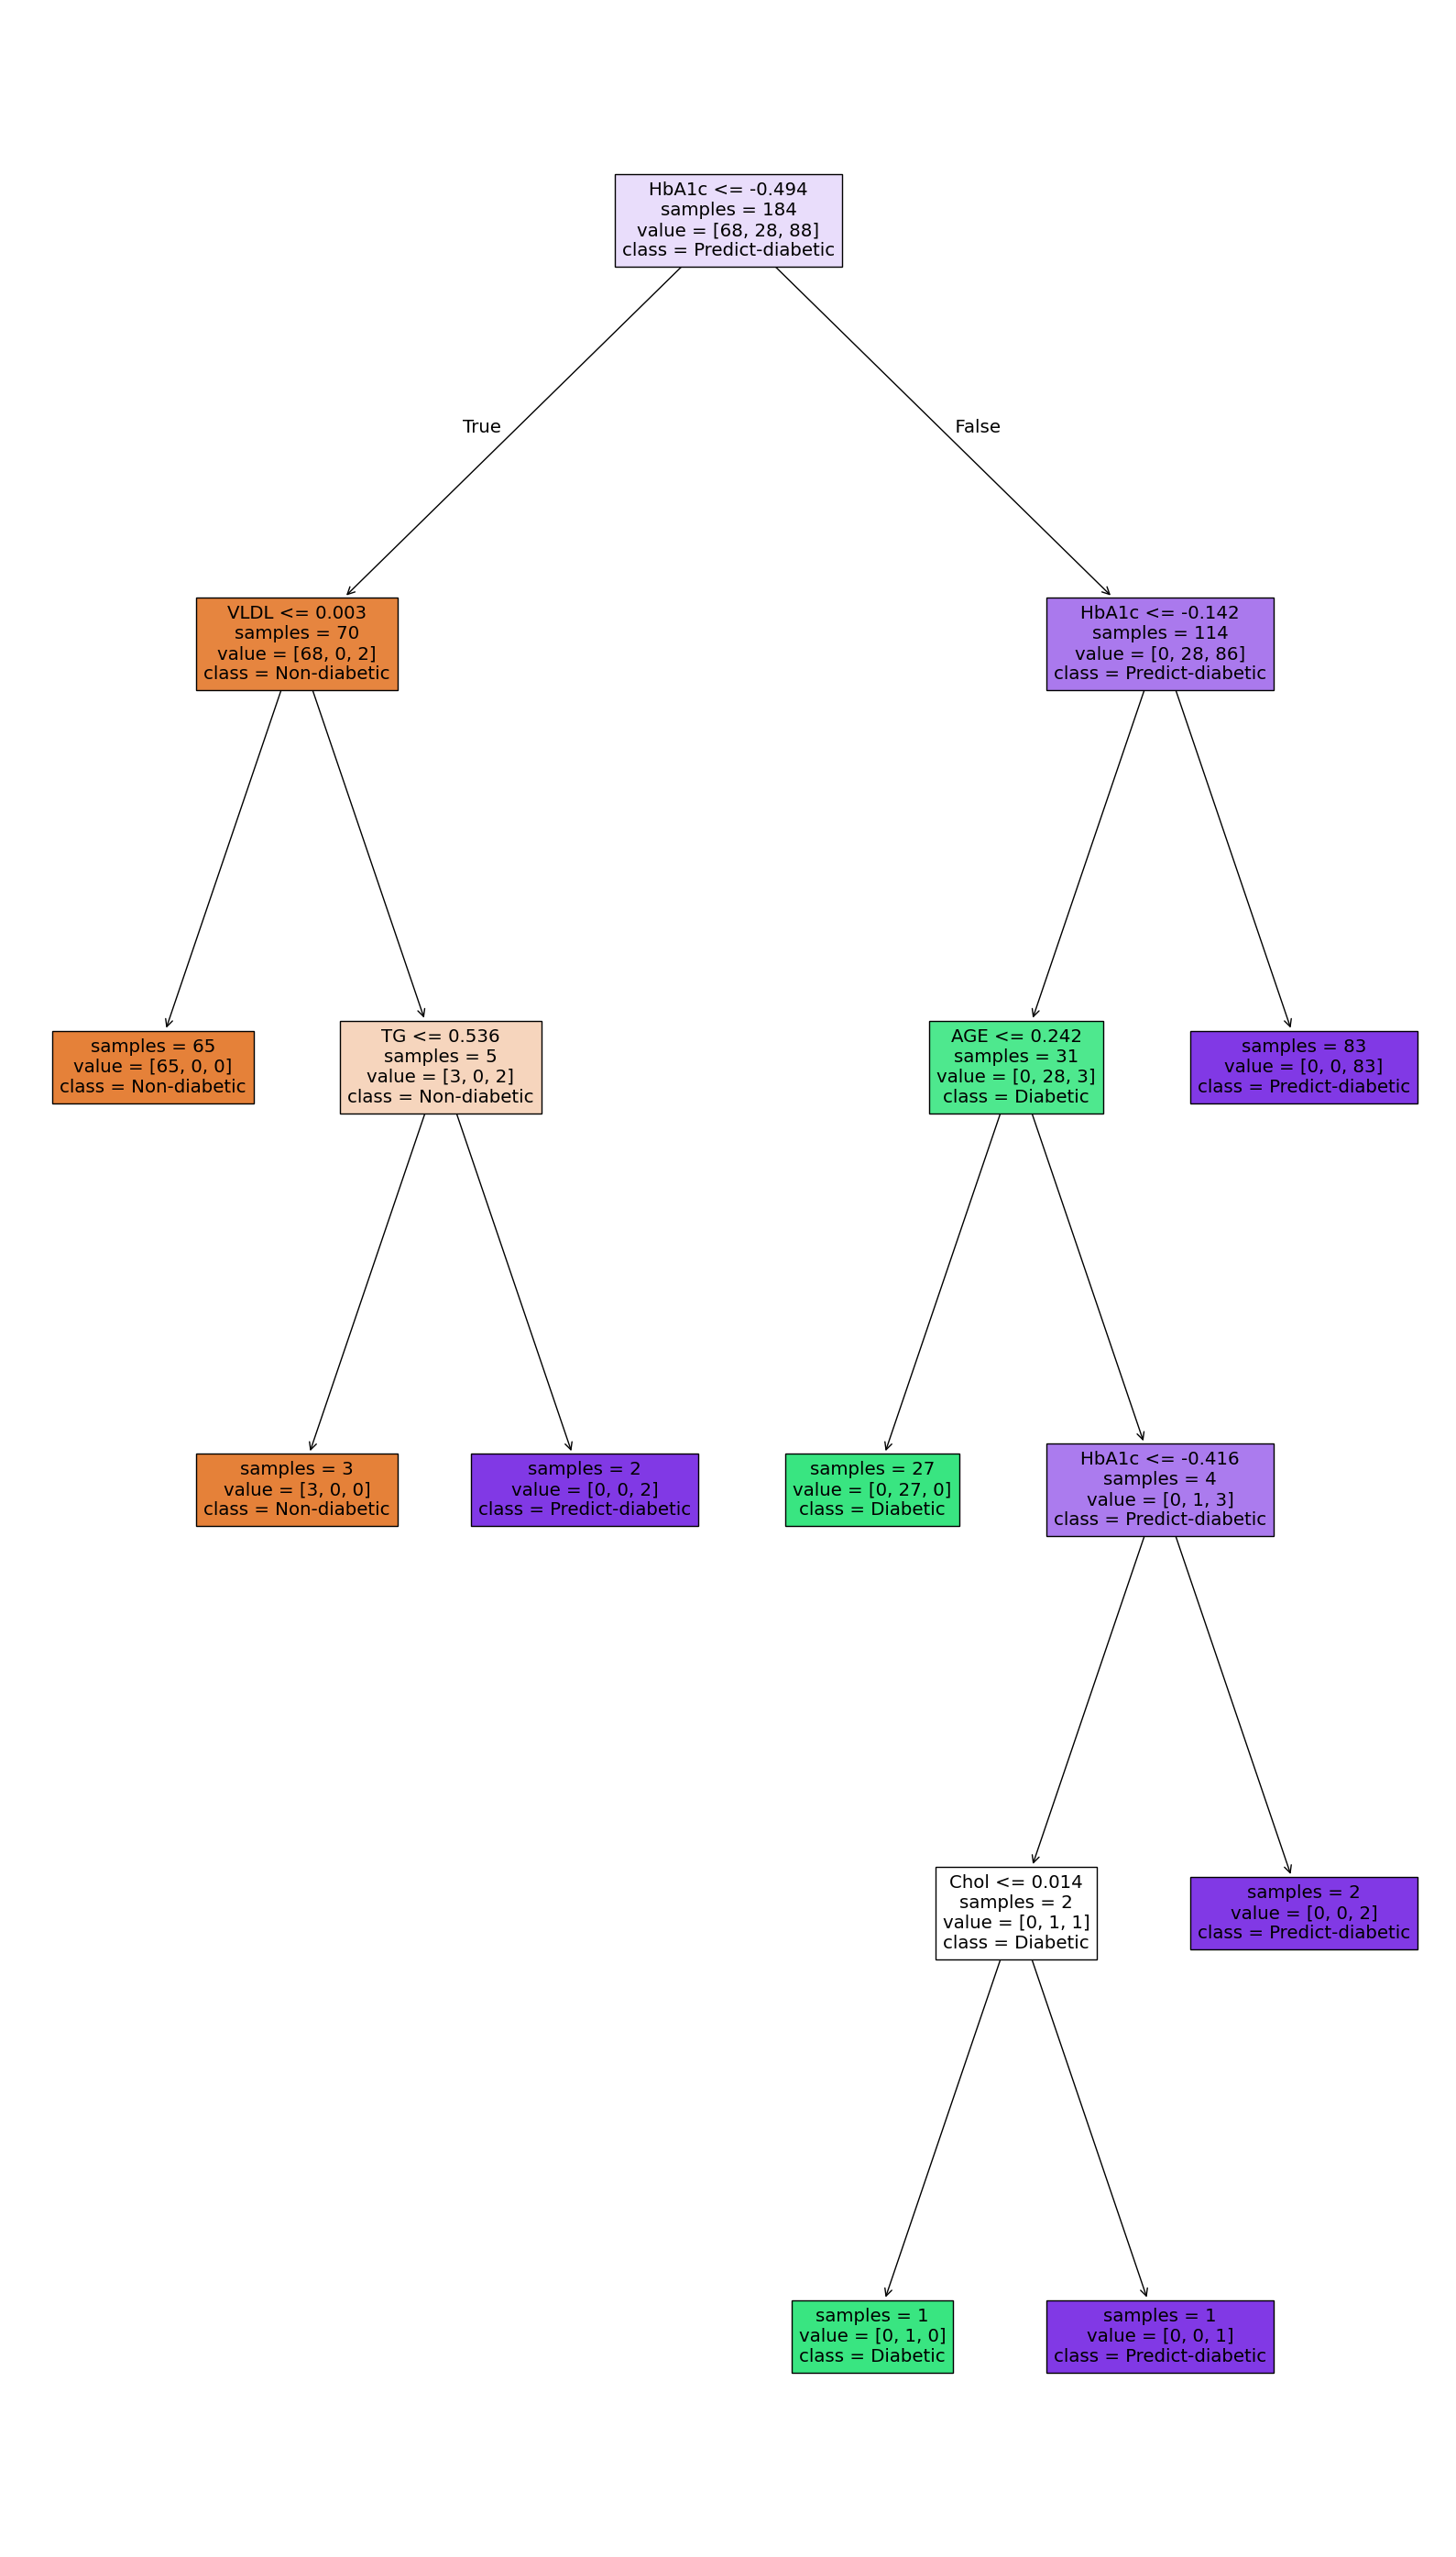

In [ ]:
# Exibindo a arvore de decisao
tree.plot_tree(tree_model, feature_names=x.columns, class_names=['Non-diabetic', 'Diabetic', 'Predict-diabetic'], filled=True, impurity=False)

### Support Vector Machine (SVM)

In [ ]:

svc_model = SVC(random_state=42)

parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}
clf = GridSearchCV(svc_model, parameters)
clf.fit(X_train_scaled, y_train)



GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
# Efetuando analise do melhor parametro para treinamento
df_result_grid = pd.DataFrame(clf.cv_results_)
df_result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005738,0.000879,0.001814,0.000406,1,linear,"{'C': 1, 'kernel': 'linear'}",0.891892,0.945946,0.918919,0.918919,0.777778,0.890691,0.058987,2
1,0.003779,0.000136,0.001698,0.000031,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.729730,0.864865,0.918919,0.810811,0.777778,0.820420,0.066050,4
2,0.007430,0.000958,0.002904,0.001030,10,linear,"{'C': 10, 'kernel': 'linear'}",0.891892,0.918919,0.945946,0.918919,0.777778,0.890691,0.058987,1
3,0.004959,0.001137,0.002635,0.001170,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.837838,0.864865,0.918919,0.756757,0.805556,0.836787,0.054618,3


In [ ]:
# best_grid_params = df_result_grid.query("rank_test_score == 1")['params']
best_grid_params = clf.best_params_
best_grid_params

{'C': 10, 'kernel': 'linear'}

In [ ]:
# Instanciando o SVC passando o resultado de bes_grid_params
svc_model = SVC(**best_grid_params, random_state=42)
# svc_model = SVC(kernel='linear', C=1, random_state=42);
svc_model.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear', random_state=42)

In [ ]:
y_pred = svc_model.predict(X_test_scaled)

In [ ]:
# acuracia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9375

In [ ]:
# Precisao
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.9385431235431234

In [ ]:
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.9375

In [ ]:
# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
f1_score_svm = f1
f1

0.937309509802061

### Redes Neurais Artificiais (RNA)

*   List item
*   List item



#### Perceptron

In [ ]:
percep_model = Perceptron(random_state=42)
percep_model.fit(X_train_scaled, y_train)

Perceptron(random_state=42)

In [ ]:
y_pred = percep_model.predict(X_test_scaled)

In [ ]:
# Acuracia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.875

In [ ]:
# Precisao
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.9078947368421053

In [ ]:
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.875

In [ ]:
# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
f1_score_perceptron = f1
f1

0.8591491841491841

#### Multilayer Perceptron

In [ ]:
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [ ]:
y_pred = mlp_model.predict(X_test_scaled)

In [ ]:
# ACuracia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8875

In [ ]:
# Precisao
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.8949999999999999

In [ ]:
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.8875

In [ ]:
# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
f1_score_multilayer_perceptron = f1
f1

0.8770042194092827

### Validação Cruzada

In [ ]:
# Criação da função de cross validation

def cross_validation(model, X_, y_, k=5):

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_index, val_index in kf.split(X_):
        x_train, x_val = X_.iloc[train_index], X_.iloc[val_index]
        y_train, y_val = y_.iloc[train_index], y_.iloc[val_index]

        # Efetua o treinamento do StandardScaler somente com os dados de treino
        scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train)
        x_val_scaled = scaler.transform(x_val)


        # Treinando o modelo no conjunto de treino
        model.fit(x_train_scaled, y_train)

        # Fazendo previsões no conjunto de validação
        # y_pred = model.predict(x_val)
        y_pred = model.predict(x_val_scaled)

        accuracies.append(accuracy_score(y_val, y_pred))
        precisions.append(precision_score(y_val, y_pred, average='weighted'))
        recalls.append(recall_score(y_val, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_val, y_pred, average='weighted'))


    return {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1_score': np.mean(f1_scores)
    }

In [ ]:
# Comparando os modelos e seus respectivos F1-Scores
scores = {
    'Logistic Regression': f1_score_logistic_regression,
    'Random Forest': f1_score_random_forest,
    'K-Nearest Neighbors': f1_score_knn,
    'Decision Tree': f1_score_decision_tree,
    'Support Vector Machine': f1_score_svm,
    'Perceptron': f1_score_perceptron,
    'Multilayer Perceptron': f1_score_multilayer_perceptron
}
scores

{'Logistic Regression': 0.869373313965553,
 'Random Forest': 0.9875305351987563,
 'K-Nearest Neighbors': 0.8254901960784313,
 'Decision Tree': 0.9624219535801719,
 'Support Vector Machine': 0.937309509802061,
 'Perceptron': 0.8591491841491841,
 'Multilayer Perceptron': 0.8770042194092827}

In [ ]:
# Percorro todos os meus modelos e aplico a função de cross validation para analise
list_models = [
    linear_model,
    random_forest,
    knn_model,
    tree_model,
    svc_model,
    percep_model,
    mlp_model
]

cross_validation_results = {model.__class__.__name__: cross_validation(model, x, y, k=5) for model in list_models}
cross_validation_results


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

{'LogisticRegression': {'accuracy': np.float64(0.8671262699564586),
  'precision': np.float64(0.8657338678093394),
  'recall': np.float64(0.8671262699564586),
  'f1_score': np.float64(0.8600295388439703)},
 'RandomForestClassifier': {'accuracy': np.float64(0.9735849056603774),
  'precision': np.float64(0.974047619047619),
  'recall': np.float64(0.9735849056603774),
  'f1_score': np.float64(0.9734121300226439)},
 'KNeighborsClassifier': {'accuracy': np.float64(0.780188679245283),
  'precision': np.float64(0.6986403804868437),
  'recall': np.float64(0.780188679245283),
  'f1_score': np.float64(0.7258289825627067)},
 'DecisionTreeClassifier': {'accuracy': np.float64(0.9584179970972423),
  'precision': np.float64(0.9601602799716007),
  'recall': np.float64(0.9584179970972423),
  'f1_score': np.float64(0.9585390614787279)},
 'SVC': {'accuracy': np.float64(0.9092162554426706),
  'precision': np.float64(0.9113745105165165),
  'recall': np.float64(0.9092162554426706),
  'f1_score': np.float64(

In [117]:
import joblib

# Substitua 'best_model' pelo nome do seu melhor modelo treinado
# No exemplo anterior, o GridSearchCV armazena o melhor modelo em 'best_rf'
best_model = random_forest

# Salva o modelo treinado em um arquivo
joblib.dump(best_model, 'melhor_modelo_diabetes.pkl')

['melhor_modelo_diabetes.pkl']